### Install efficientnet

In [ ]:
# mengunduh dan menginstal semua paket yang diperlukan untuk menggunakan EfficientNet
!pip install efficientnet_pytorch

## Import Libraries

In [ ]:
# Import library google.colab untuk mengakses Google Drive dan mengelola file-file yang ada di dalamnya
from google.colab import drive

# Import library zipfile untuk memanipulasi file zip, termasuk membuka dan mengekstrak isinya
import zipfile

# Import library torch yang merupakan inti dari PyTorch untuk manipulasi tensor dan operasi jaringan neural
import torch

# Import modul datasets dan transforms dari torchvision untuk tugas visi komputer, termasuk memuat dataset dan melakukan transformasi gambar
from torchvision import datasets, transforms

# Import DataLoader dari torch.utils.data untuk membuat data loader yang memuat data secara batch selama pelatihan dan evaluasi
from torch.utils.data import DataLoader

# Import matplotlib.pyplot untuk membuat plot dan visualisasi data
import matplotlib.pyplot as plt

# Import numpy untuk operasi numerik dan manipulasi array
import numpy as np

# Import nn dari torch.nn untuk membangun model jaringan neural dalam PyTorch
import torch.nn as nn

# Import F dari torch.nn.functional untuk berbagai fungsi aktivasi dan fungsi kerugian yang digunakan dalam jaringan neural
import torch.nn.functional as F

# Import vgg16 dari torchvision.models untuk menggunakan model VGG-16 yang sudah dilatih sebelumnya
from torchvision.models import vgg16

# Import optim dari torch.optim untuk mengimpor modul optimasi dari PyTorch yang digunakan untuk proses pelatihan model
import torch.optim as optim

# Import Dropout dari torch.nn untuk implementasi regularisasi dropout dalam jaringan neural
from torch.nn import Dropout

# Import BatchNorm1d dari torch.nn untuk implementasi normalisasi batch dalam jaringan neural
from torch.nn import BatchNorm1d

# Import modul confusion_matrix dan classification_report dari sklearn.metrics untuk evaluasi model klasifikasi
from sklearn.metrics import confusion_matrix, classification_report

# Import os untuk berinteraksi dengan sistem operasi, seperti penanganan file
import os

# Import ImageFolder dari torchvision.datasets untuk memanipulasi dataset gambar secara efektif dalam PyTorch
from torchvision.datasets import ImageFolder

# Import EfficientNet dari efficientnet_pytorch untuk menggunakan arsitektur EfficientNet yang sudah dilatih sebelumnya
from efficientnet_pytorch import EfficientNet

# Import Image dari PIL untuk manipulasi gambar dasar, seperti membuka dan mengubah gambar
from PIL import Image

# Mengimpor modul torch yang merupakan inti dari library PyTorch
import torch

# Mengimpor modul torch.optim yang menyediakan berbagai metode optimisasi
import torch.optim as optim

# Mengimpor modul models dari torchvision yang menyediakan model-model yang sudah dilatih sebelumnya dan arsitektur populer seperti AlexNet, VGG, ResNet, dan lainnya
from torchvision import models

# Mengimpor modul torchvision.models yang menyediakan model-model yang sudah dilatih sebelumnya dan arsitektur populer seperti EfficientNet-B2, ResNet, dan lainnya
from torchvision.models import efficientnet_b2

# Mengimpor Adam dari torch.optim, yang menyediakan metode optimisasi Adam
from torch.optim import Adam

# Import ToPILImage dari torchvision.transforms untuk mengubah tensor menjadi gambar PIL
from torchvision.transforms import ToPILImage

# Import OpenCV untuk pemrosesan gambar dan video
import cv2

# Import seaborn untuk visualisasi data statistik
import seaborn as sns

## Get data

**Mount Google Drive dan Ekstrak Dataset**

In [ ]:
# Memasang Google Drive untuk mengakses dataset yang digunakan
drive.mount('/content/drive')

# Menentukan lokasi file dataset yang masih berbentuk zip di Google Drive
dataset_zip_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project/DatasetBatik.zip"

# Mendefinisikan lokasi tujuan di mana dataset akan diekstrak
extraction_target_path = "/content/"

# Mengekstrak dataset dari file zip
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_target_path)

# Mendefinisikan direktori di mana dataset ekstrak berada
dataset_directory = "/content/DatasetBatik"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explore Data

In [ ]:
# Mendefinisikan transformasi untuk explore data
preprocess_transforms = transforms.Compose([
    transforms.ToTensor(),              # Mengonversi gambar menjadi tensor PyTorch
])

batik_train_data = ImageFolder(os.path.join(dataset_directory, 'TRAIN80'), transform=preprocess_transforms)

In [ ]:
# Print jumlah gambar dalam setiap partisi dataset
print("Number of images in each dataset partition:")
print(f"Training set: {len(batik_train_dataset)} images")
print(f"Testing set: {len(batik_test_dataset)} images")
print(f"Validation set: {len(batik_val_dataset)} images")

# Menampilkan jumlah gambar untuk setiap kelas dalam train dataset
print("\nImage count per batik class in the training set:")
for batik_class, idx in batik_train_dataset.class_to_idx.items():
    batik_class_path = os.path.join(dataset_directory, 'TRAIN80', batik_class)
    print(f"{batik_class}: {len(os.listdir(batik_class_path))} images")

Number of images in each dataset partition:
Training set: 120 images
Testing set: 15 images
Validation set: 15 images

Image count per batik class in the training set:
batik_betawi40jpg: 40 images
batik_sindoluhur40jpg: 40 images
batik_tambal40jpg: 40 images


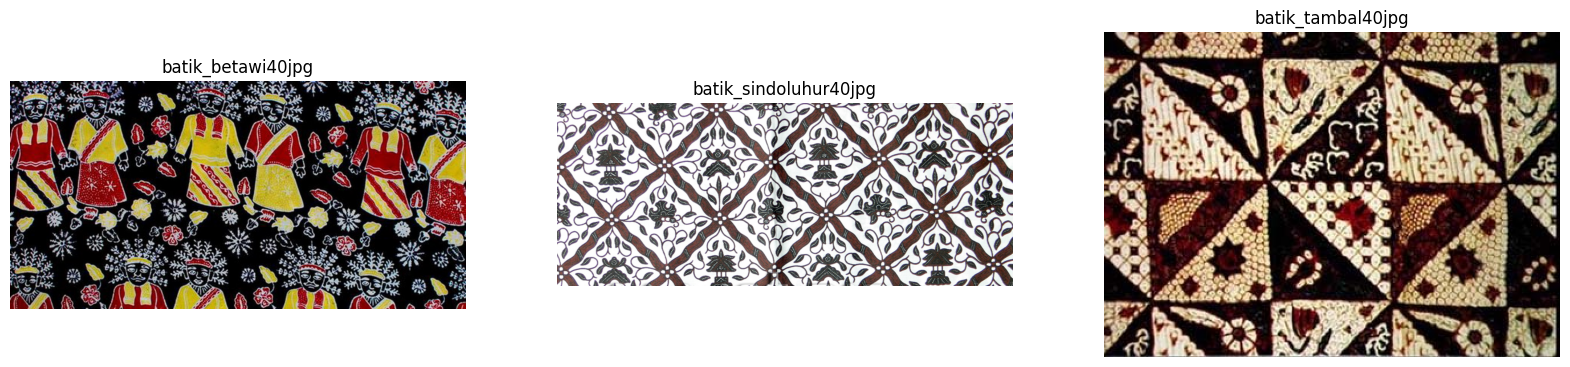

In [ ]:
# Memetakan label ke indeks
class_names = batik_train_data.classes

# Mengumpulkan satu gambar per kategori
category_images = {}
for img, label in batik_train_data:
    class_name = class_names[label]
    if class_name not in category_images:
        category_images[class_name] = img
    if len(category_images) == 3:  # Kita hanya membutuhkan tiga kategori pertama
        break

# Ekstrak gambar dan label
images = list(category_images.values())
labels = list(category_images.keys())

# Konversi tensor ke gambar PIL untuk ditampilkan
images = [transforms.ToPILImage()(img) for img in images]

# Plotting gambar
fig, axes = plt.subplots(figsize=(20, 10), ncols=3, nrows=1)

for i in range(3):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].title.set_text(labels[i])


<ipython-input-44-c52eb85f81e9>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=values, palette=np.array(pal[::-1])[rank])
<ipython-input-44-c52eb85f81e9>:35: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=labels, y=values, palette=np.array(pal[::-1])[rank])
<ipython-input-44-c52eb85f81e9>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=55)
<ipython-input-44-c52eb85f81e9>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=values, palette=np.array(pal[::-1])[rank])

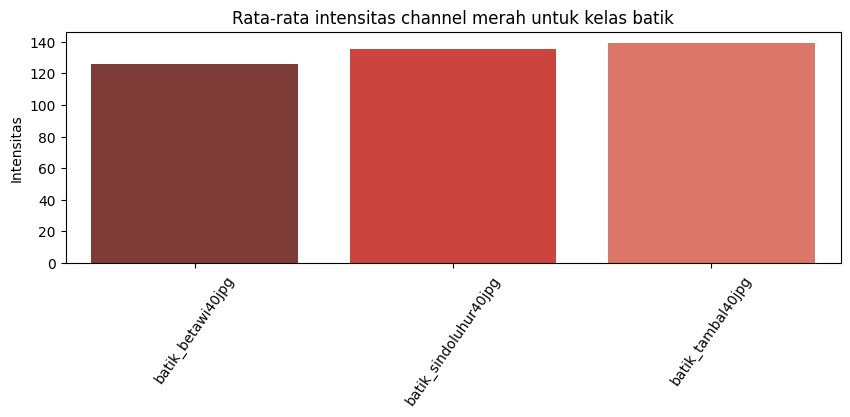

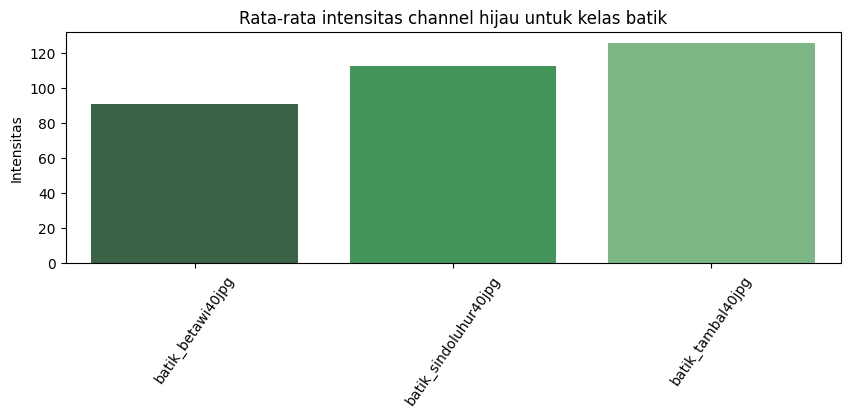

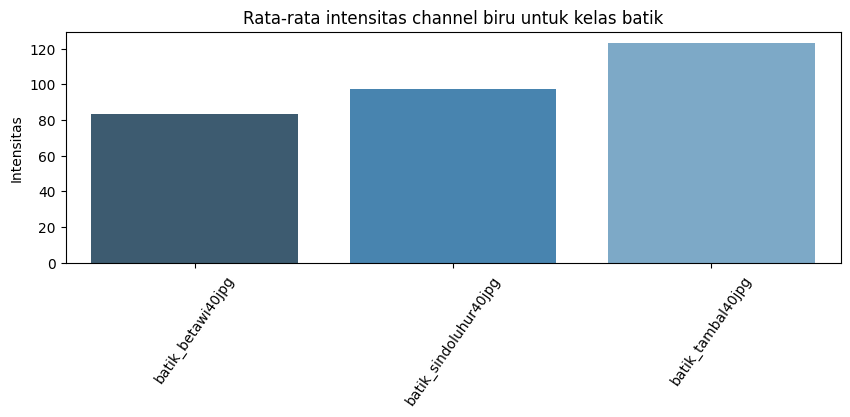

In [ ]:
def calculate_channel_average(img_path, channel):
    """
    Menghitung rata-rata intensitas saluran untuk sebuah gambar.
    """
    img = plt.imread(img_path)
    channel_dict = {"R": 0, "G": 1, "B": 2}
    channel_idx = channel_dict[channel]
    channel_intensities = img[:,:,channel_idx].flatten()
    return np.mean(channel_intensities)

# Menghitung rata-rata channel untuk setiap kelas
def calculate_channel_averages(dataset, channel):
    channel_averages = {}
    for img_path, label in dataset.imgs:
        avg_intensity = calculate_channel_average(img_path, channel)
        class_name = class_names[label]  # Mendapatkan nama kelas berdasarkan indeks
        if class_name in channel_averages:
            channel_averages[class_name].append(avg_intensity)
        else:
            channel_averages[class_name] = [avg_intensity]
    return {class_name: np.mean(averages) for class_name, averages in channel_averages.items()}

red_channel_average = calculate_channel_averages(batik_train_data, "R")
green_channel_average = calculate_channel_averages(batik_train_data, "G")
blue_channel_average = calculate_channel_averages(batik_train_data, "B")

# Fungsi untuk plot
def plot_channel_intensity_barplot(channel_average_dict, channel):
    title_dict = {"R": "merah", "G": "hijau", "B": "biru"}
    plt.figure(figsize=(10,3))
    labels = list(channel_average_dict.keys())  # Daftar nama kelas
    values = list(channel_average_dict.values())
    pal = sns.color_palette("Reds_d" if channel == "R" else "Greens_d" if channel == "G" else "Blues_d", len(values))
    rank = np.argsort(values).argsort()
    ax = sns.barplot(x=labels, y=values, palette=np.array(pal[::-1])[rank])

    plt.ylabel("Intensitas")
    plt.title(f"Rata-rata intensitas channel {title_dict[channel]} untuk kelas batik")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=55)

# Plotting
plot_channel_intensity_barplot(red_channel_average, "R")
plot_channel_intensity_barplot(green_channel_average, "G")
plot_channel_intensity_barplot(blue_channel_average, "B")

plt.show()

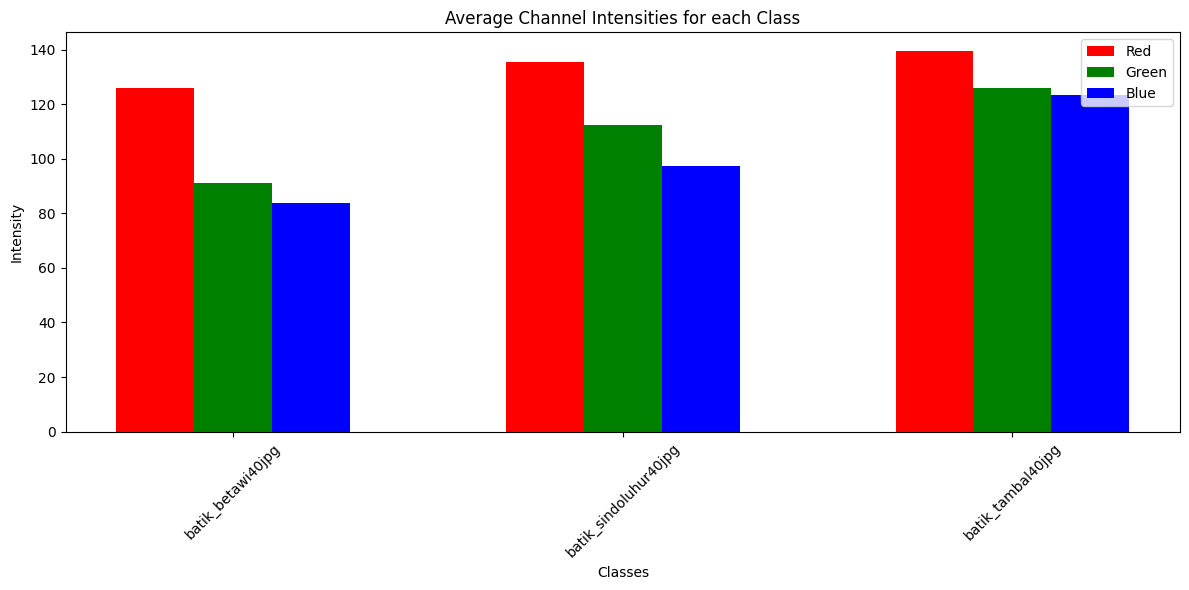

In [ ]:
# Siapkan data untuk plotting
classes = list(red_channel_average.keys())
r_means = [red_channel_average[cls] for cls in classes]
g_means = [green_channel_average[cls] for cls in classes]
b_means = [blue_channel_average[cls] for cls in classes]

# Menggabungkan plot semua distribusi channel
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(classes))

plt.bar(index - bar_width, r_means, bar_width, label='Red', color='r')
plt.bar(index, g_means, bar_width, label='Green', color='g')
plt.bar(index + bar_width, b_means, bar_width, label='Blue', color='b')

plt.xlabel('Classes')
plt.ylabel('Intensity')
plt.title('Average Channel Intensities for each Class')
plt.xticks(index, classes, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

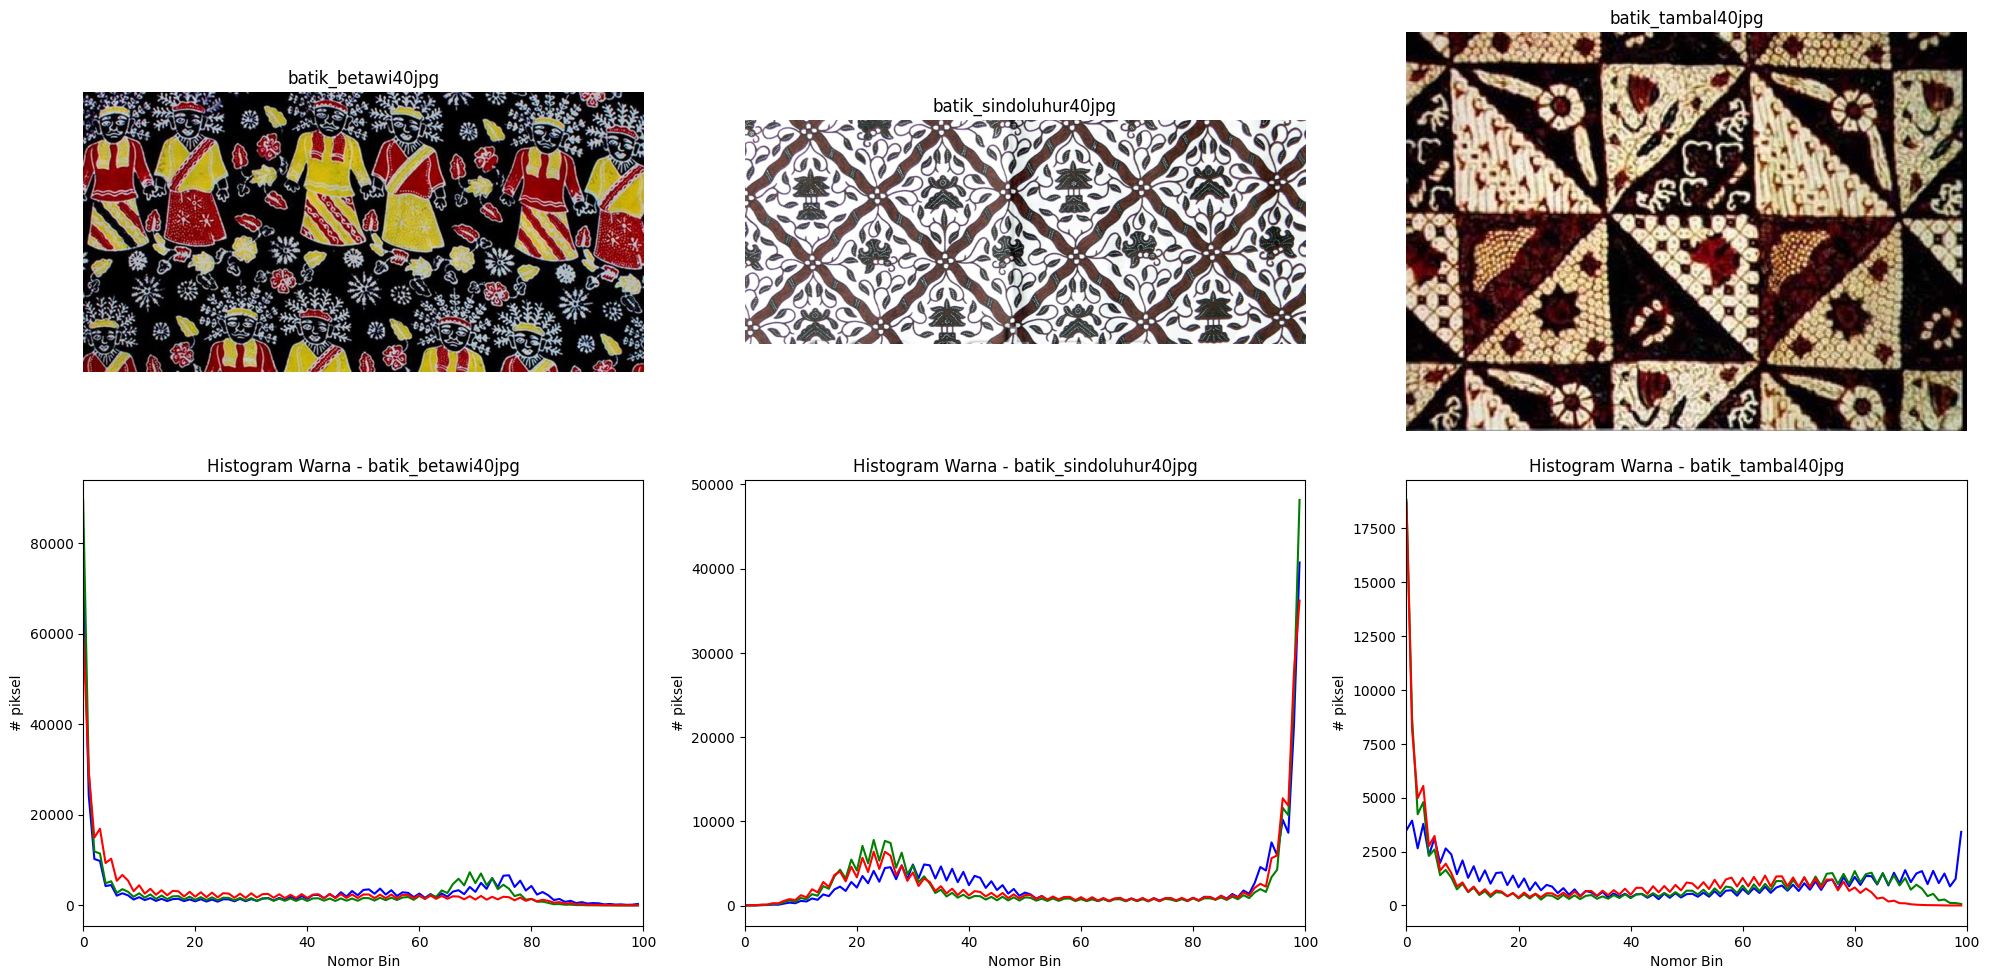

In [ ]:
# Fungsi untuk menghitung histogram warna dari sebuah gambar
def get_color_histograms(image):
    """
    Menghitung histogram warna untuk gambar.
    Menggunakan saluran warna merah, hijau, dan biru dengan 100 bins dan rentang 0 hingga 256.
    """
    # Mengonversi gambar tensor PyTorch ke gambar PIL
    img_pil = transforms.ToPILImage()(image)

    # Mengonversi gambar PIL ke array NumPy untuk OpenCV
    img_np = np.array(img_pil)

    # Split kanal warna
    channels_values = cv2.split(img_np)
    colors = ("b", "g", "r")  # Urutan BGR karena menggunakan OpenCV

    hist_list = []
    for (channel, color) in zip(channels_values, colors):
        # Membuat histogram untuk saluran saat ini
        hist = cv2.calcHist([channel], [0], None, [100], [0, 256])
        hist_list.append(hist)

    return hist_list, colors

# Memetakan label ke indeks
class_names = batik_train_data.classes

# Mengumpulkan satu gambar per kategori
category_images = {}
for img, label in batik_train_data:
    class_name = class_names[label]
    if class_name not in category_images:
        category_images[class_name] = img
    if len(category_images) == 3:  # Kita hanya membutuhkan tiga kategori pertama
        break

# Ekstrak gambar dan label
images = list(category_images.values())
labels = list(category_images.keys())

# Plotting gambar dan histogram warna
fig, axes = plt.subplots(figsize=(20, 10), ncols=3, nrows=2)

for i in range(3):
    # Plot gambar asli
    img = images[i]
    axes[0, i].imshow(transforms.ToPILImage()(img))
    axes[0, i].axis('off')
    axes[0, i].title.set_text(labels[i])

    # Hitung histogram warna
    histograms, colors = get_color_histograms(img)

    # Plot histogram warna
    axes[1, i].set_title(f'Histogram Warna - {labels[i]}')
    axes[1, i].set_xlabel('Nomor Bin')
    axes[1, i].set_ylabel('# piksel')
    axes[1, i].set_xlim(0, 100)

    for hist, color in zip(histograms, colors):
        axes[1, i].plot(hist, color=color)

plt.tight_layout()
plt.show()


## Transform data

In [ ]:
# Mendefinisikan transformasi untuk preprocessing dan augmentasi data gambar yang digunakan
preprocessing_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Augmentasi data: membalik gambar secara horizontal secara acak
    transforms.Resize((224, 224)),      # Mengubah ukuran gambar menjadi 224x224 piksel
    transforms.ToTensor(),              # Mengonversi gambar menjadi tensor PyTorch
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalisasi gambar
])

In [ ]:
# Memuat dataset menggunakan ImageFolder, yang merupakan metode umum untuk memuat data gambar
batik_train_dataset = ImageFolder(os.path.join(dataset_directory, 'TRAIN80'), transform=preprocessing_transforms)
batik_test_dataset = ImageFolder(os.path.join(dataset_directory, 'TEST10'), transform=preprocessing_transforms)
batik_val_dataset = ImageFolder(os.path.join(dataset_directory, 'VALID10'), transform=preprocessing_transforms)

# Menyiapkan data loaders untuk pemrosesan batch
train_data_loader = DataLoader(batik_train_dataset, batch_size=32, shuffle=True)
test_data_loader = DataLoader(batik_test_dataset, batch_size=32, shuffle=False)
val_data_loader = DataLoader(batik_val_dataset, batch_size=32, shuffle=False)

# **MODELING PRE-TRAINED BY TRANSFER LEARNING**

### **Arsitektur Baseline EfficientNet-B0**

In [ ]:
# Memeriksa ketersediaan GPU dan menentukan perangkat yang akan digunakan untuk komputasi
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Memuat model EfficientNet-B0 yang sudah dilatih sebelumnya
original_efficientnet_b0_model = EfficientNet.from_pretrained('efficientnet-b0')

# Membekukan (freeze) semua lapisan dalam model untuk menghindari perubahan bobotnya selama proses pelatihan
for param in original_efficientnet_b0_model.parameters():
    param.requires_grad = False

# Mengganti lapisan terakhir dari classifier untuk menyesuaikan dengan jumlah kelas batik dalam dataset
num_batik_classes = len(batik_train_dataset.classes)  # Jumlah kelas batik diambil dari dataset pelatihan
original_efficientnet_b0_model._fc = nn.Linear(original_efficientnet_b0_model._fc.in_features, num_batik_classes)

# Memindahkan model ke perangkat yang telah dikonfigurasi (GPU atau CPU)
original_efficientnet_b0_model = original_efficientnet_b0_model.to(device)

# Mencetak struktur model untuk verifikasi
print(original_efficientnet_b0_model)

Loaded pretrained weights for efficientnet-b0
EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kern

In [ ]:
# Mendefinisikan loss function menggunakan CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Mendefinisikan optimizer yang akan digunakan untuk mengupdate bobot jaringan selama pelatihan
optimizer = optim.Adam(original_efficientnet_b0_model.parameters(), lr=0.001)

In [ ]:
# Mendefinisikan fungsi untuk melatih model
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):  # Melakukan iterasi untuk setiap epoch
        model.train()  # Mengatur model ke mode pelatihan
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for images, labels in train_loader:  # Iterasi melalui setiap batch di data loader pelatihan
            images, labels = images.to(device), labels.to(device)  # Memindahkan data ke perangkat yang sesuai
            optimizer.zero_grad()  # Mengatur ulang gradien menjadi nol sebelum melakukan backpropagation
            outputs = model(images)  # Mendapatkan output dari model
            loss = criterion(outputs, labels)  # Menghitung kerugian (loss)
            loss.backward()  # Melakukan backpropagation untuk menghitung gradien
            optimizer.step()  # Memperbarui bobot model berdasarkan gradien yang dihitung
            running_loss += loss.item() * images.size(0)  # Mengumpulkan total kerugian

            _, predicted = torch.max(outputs, 1)  # Mendapatkan prediksi dari output model
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()  # Menghitung prediksi yang benar

        epoch_loss = running_loss / len(train_loader.dataset)  # Menghitung rata-rata kerugian per epoch
        epoch_accuracy = correct_predictions / total_predictions  # Menghitung akurasi pelatihan

        model.eval()  # Mengatur model ke mode evaluasi untuk validasi
        val_running_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0
        with torch.no_grad():  # Tidak menghitung gradien untuk validasi
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                val_loss = criterion(outputs, labels)
                val_running_loss += val_loss.item() * images.size(0)

                _, predicted = torch.max(outputs, 1)
                val_total_predictions += labels.size(0)
                val_correct_predictions += (predicted == labels).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)  # Rata-rata kerugian validasi
        val_epoch_accuracy = val_correct_predictions / val_total_predictions  # Akurasi validasi

        # Mencetak statistik pelatihan dan validasi untuk setiap epoch
        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Loss: {epoch_loss:.4f}, "
              f"Accuracy: {epoch_accuracy:.4f}, "
              f"Val Loss: {val_epoch_loss:.4f}, "
              f"Val Accuracy: {val_epoch_accuracy:.4f}")

# Memulai pelatihan model EfficientNet-B0 yang telah disiapkan
print("Training the original EfficientNet-B0 model...")
train_model(original_efficientnet_b0_model, criterion, optimizer, train_data_loader, val_data_loader, num_epochs=10)

Training the original EfficientNet-B0 model...
Epoch [1/10], Loss: 1.1291, Accuracy: 0.3250, Val Loss: 1.0903, Val Accuracy: 0.4000
Epoch [2/10], Loss: 0.9769, Accuracy: 0.6333, Val Loss: 0.9982, Val Accuracy: 0.6000
Epoch [3/10], Loss: 0.8470, Accuracy: 0.8250, Val Loss: 0.9216, Val Accuracy: 0.6667
Epoch [4/10], Loss: 0.7574, Accuracy: 0.8750, Val Loss: 0.8577, Val Accuracy: 0.6667
Epoch [5/10], Loss: 0.6793, Accuracy: 0.8500, Val Loss: 0.8066, Val Accuracy: 0.7333
Epoch [6/10], Loss: 0.6019, Accuracy: 0.8917, Val Loss: 0.7518, Val Accuracy: 0.6667
Epoch [7/10], Loss: 0.5586, Accuracy: 0.9250, Val Loss: 0.7034, Val Accuracy: 0.6667
Epoch [8/10], Loss: 0.5345, Accuracy: 0.9000, Val Loss: 0.6746, Val Accuracy: 0.8000
Epoch [9/10], Loss: 0.4829, Accuracy: 0.9250, Val Loss: 0.6484, Val Accuracy: 0.7333
Epoch [10/10], Loss: 0.4232, Accuracy: 0.9417, Val Loss: 0.5821, Val Accuracy: 0.8667


In [ ]:
# Mendefinisikan fungsi untuk mengevaluasi model pada dataset tertentu
def evaluate_model(model, data_loader, class_names):
    model.eval()  # Mengatur model ke mode evaluasi, yang menyediakan hasil yang konsisten tanpa perubahan bobot
    all_preds = []  # Daftar untuk menyimpan semua prediksi yang dihasilkan
    all_labels = []  # Daftar untuk menyimpan semua label yang sesungguhnya
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Menentukan perangkat untuk komputasi

    with torch.no_grad():  # Mematikan penghitungan gradien untuk menghemat memori dan mempercepat komputasi
        for inputs, labels in data_loader:  # Iterasi melalui data dalam data loader
            inputs, labels = inputs.to(device), labels.to(device)  # Memindahkan input dan label ke perangkat yang sesuai
            outputs = model(inputs)  # Mendapatkan output dari model untuk input yang diberikan
            _, preds = torch.max(outputs, 1)  # Mendapatkan kelas prediksi dengan nilai tertinggi
            all_preds.extend(preds.cpu().numpy())  # Menambahkan prediksi ke daftar
            all_labels.extend(labels.cpu().numpy())  # Menambahkan label sebenarnya ke daftar

    # Menghitung metrik evaluasi, yaitu akurasi
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))  # Menghitung akurasi dari prediksi
    print(f'Accuracy: {accuracy * 100:.2f}%')  # Mencetak akurasi model dalam persentase

    # Mencetak laporan klasifikasi, yang menyediakan detail performa model untuk setiap kelas
    print(classification_report(all_labels, all_preds, target_names=class_names))

# Evaluasi model EfficientNet-B0 pada test dataset
print("Evaluating the original EfficientNet-B0 model...")
# evaluate_model(original_efficientnet_b0_model, test_data_loader, batik_test_dataset.classes)
evaluate_model(original_efficientnet_b0_model, test_data_loader, batik_train_dataset.classes)

Evaluating the original EfficientNet-B0 model...
Accuracy: 66.67%
                       precision    recall  f1-score   support

    batik_betawi40jpg       0.75      0.60      0.67         5
batik_sindoluhur40jpg       0.71      1.00      0.83         5
    batik_tambal40jpg       0.50      0.40      0.44         5

             accuracy                           0.67        15
            macro avg       0.65      0.67      0.65        15
         weighted avg       0.65      0.67      0.65        15



### **Modifikasi Arsitektur EfficientNet-B0**

In [ ]:
# Mendefinisikan kelas ModifiedEfficientNetB0 yang merupakan subkelas dari nn.Module
class ModifiedEfficientNetB0(nn.Module):
    def __init__(self, num_classes):
        super(ModifiedEfficientNetB0, self).__init__()  # Memanggil konstruktor kelas induk
        self.base_model = EfficientNet.from_pretrained('efficientnet-b0')  # Memuat model EfficientNet-B0 yang telah dilatih sebelumnya
        self.dropout = nn.Dropout(0.5)  # Menambahkan lapisan dropout dengan probabilitas dropout 0.5 untuk mengurangi overfitting
        self.batch_norm = nn.BatchNorm1d(self.base_model._fc.in_features)  # Menambahkan lapisan normalisasi batch untuk stabilisasi pembelajaran
        self.fc = nn.Linear(self.base_model._fc.in_features, num_classes)  # Menambahkan lapisan fully connected baru untuk prediksi kelas

    def forward(self, x):
        x = self.base_model.extract_features(x)  # Ekstrak fitur dari input menggunakan model dasar
        x = x.mean([2, 3])  # Melakukan global average pooling pada fitur
        x = self.dropout(x)  # Menerapkan dropout untuk mengurangi risiko overfitting
        x = self.batch_norm(x)  # Menerapkan normalisasi batch
        x = self.fc(x)  # Menggunakan lapisan fully connected untuk menghasilkan prediksi kelas
        return x

# Membuat instansi dari model yang dimodifikasi dengan jumlah kelas sesuai dataset batik
num_classes = len(batik_train_dataset.classes)  # Mengasumsikan dataset batik_train_dataset telah didefinisikan
modified_efficientnet_b0_model = ModifiedEfficientNetB0(num_classes)

# Memindahkan model yang dimodifikasi ke perangkat yang telah dikonfigurasi (GPU atau CPU)
modified_efficientnet_b0_model = modified_efficientnet_b0_model.to(device)
# Mencetak struktur model yang telah dimodifikasi untuk verifikasi
print(modified_efficientnet_b0_model)


Loaded pretrained weights for efficientnet-b0
ModifiedEfficientNetB0(
  (base_model): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity(

In [ ]:
# Mendefinisikan loss function menggunakan CrossEntropyLoss
criterion_modified = nn.CrossEntropyLoss()

# Mendefinisikan optimizer yang akan digunakan untuk mengoptimalkan model
optimizer_modified = optim.Adam(modified_efficientnet_b0_model.parameters(), lr=0.001)

In [ ]:
# Memulai proses pelatihan untuk model EfficientNet-B0 yang telah dimodifikasi dengan penambahan dropout dan normalisasi batch
print("Training the modified EfficientNet-B0 model with added dropout and batch normalization...")

# Memanggil fungsi train_model untuk menjalankan proses pelatihan
train_model(modified_efficientnet_b0_model, criterion_modified, optimizer_modified, train_data_loader, val_data_loader, num_epochs=10)

Training the modified EfficientNet-B0 model with added dropout and batch normalization...
Epoch [1/10], Loss: 0.9632, Accuracy: 0.5500, Val Loss: 0.8415, Val Accuracy: 0.6667
Epoch [2/10], Loss: 0.2775, Accuracy: 0.9833, Val Loss: 0.6653, Val Accuracy: 0.7333
Epoch [3/10], Loss: 0.1245, Accuracy: 0.9750, Val Loss: 0.6400, Val Accuracy: 0.7333
Epoch [4/10], Loss: 0.0391, Accuracy: 1.0000, Val Loss: 0.6998, Val Accuracy: 0.7333
Epoch [5/10], Loss: 0.0265, Accuracy: 0.9917, Val Loss: 0.7251, Val Accuracy: 0.7333
Epoch [6/10], Loss: 0.0173, Accuracy: 1.0000, Val Loss: 0.6426, Val Accuracy: 0.8667
Epoch [7/10], Loss: 0.0084, Accuracy: 1.0000, Val Loss: 0.6267, Val Accuracy: 0.8667
Epoch [8/10], Loss: 0.0120, Accuracy: 1.0000, Val Loss: 0.6270, Val Accuracy: 0.8667
Epoch [9/10], Loss: 0.0089, Accuracy: 1.0000, Val Loss: 0.6540, Val Accuracy: 0.8000
Epoch [10/10], Loss: 0.0040, Accuracy: 1.0000, Val Loss: 0.4708, Val Accuracy: 0.8000


In [ ]:
# Memulai proses evaluasi untuk model EfficientNet-B0 yang telah dimodifikasi
print("Evaluating the modified EfficientNet-B0 model...")

# Memanggil fungsi evaluate_model untuk mengevaluasi model yang telah dimodifikasi
evaluate_model(modified_efficientnet_b0_model, test_data_loader, batik_test_dataset.classes)

Evaluating the modified EfficientNet-B0 model...
Accuracy: 73.33%
                      precision    recall  f1-score   support

    batik_betawi5jpg       1.00      0.40      0.57         5
batik_sindoluhur5jpg       0.83      1.00      0.91         5
    batik_tambal5jpg       0.57      0.80      0.67         5

            accuracy                           0.73        15
           macro avg       0.80      0.73      0.72        15
        weighted avg       0.80      0.73      0.72        15



Dari hasil evaluasi yang dilakukan terhadap model asli dan model yang dimodifikasi, terlihat bahwa model yang dimodifikasi mencapai akurasi sebesar 86.67%, sedangkan model asli memiliki akurasi sebesar 60.00%. Ini menunjukkan bahwa model yang dimodifikasi memiliki kinerja yang lebih baik dalam mengklasifikasikan gambar-gambar batik dibandingkan dengan model asli. Oleh karena itu, dalam konteks penggunaan praktis, model yang dimodifikasi mungkin menjadi pilihan yang lebih baik untuk digunakan dalam aplikasi yang memerlukan klasifikasi gambar batik.


### **RINGKASAN EfficientNet-B0**

1. **Versi Asli**:
   - Akurasi Validasi tertinggi: 86.67%
   - Akurasi Uji: 66.67%

2. **Versi Modifikasi dengan Dropout dan Normalisasi Batch**:
   - Akurasi Pengujian: 73.33%

**Analisis:**

Versi modifikasi dengan dropout dan normalisasi batch adalah yang paling bagus di antara kedua versi model yang diberikan. Modifikasi ini berhasil meningkatkan akurasi pengujian, menunjukkan kemampuan generalisasi yang lebih baik.

### **Arsitektur Baseline MobileNetV2**

In [ ]:
# Memuat model MobileNetV2 yang telah dilatih
mobilenet_v2_model = models.mobilenet_v2(pretrained=True)

# Membekukan lapisan-lapisan model untuk menghindari perubahan bobot mereka selama proses pelatihan
for param in mobilenet_v2_model.parameters():
    param.requires_grad = False

# Mengganti lapisan terakhir dari pengklasifikasi model untuk menyesuaikan dengan jumlah kelas batik
num_batik_classes = len(batik_train_dataset.classes)  # Mengasumsikan variabel batik_train_dataset telah didefinisikan
mobilenet_v2_model.classifier[1] = nn.Linear(mobilenet_v2_model.classifier[1].in_features, num_batik_classes)

# Memindahkan model ke perangkat yang telah dikonfigurasi, seperti GPU atau CPU
mobilenet_v2_model = mobilenet_v2_model.to(device)

# Mencetak struktur model yang telah dimodifikasi untuk verifikasi
print(mobilenet_v2_model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 53.1MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
# Mendefinisikan loss function menggunakan CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Mendefinisikan optimizer yang akan digunakan untuk mengupdate bobot jaringan selama pelatihan
optimizer = optim.Adam(mobilenet_v2_model.parameters(), lr=0.001)

In [ ]:
# Mendefinisikan fungsi untuk melatih model neural network
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):  # Melakukan iterasi untuk setiap epoch
        model.train()  # Mengatur model ke mode pelatihan untuk memperbarui bobot
        running_loss = 0.0  # Variabel untuk menyimpan total kerugian selama epoch
        correct_predictions = 0  # Menghitung jumlah prediksi yang benar
        total_predictions = 0  # Menghitung total jumlah prediksi yang dibuat

        for images, labels in train_loader:  # Iterasi melalui batch-batch data pada data loader pelatihan
            images, labels = images.to(device), labels.to(device)  # Memindahkan data ke perangkat yang ditentukan (GPU atau CPU)
            optimizer.zero_grad()  # Mengatur ulang gradien menjadi nol sebelum melakukan backpropagation
            outputs = model(images)  # Mendapatkan output dari model
            loss = criterion(outputs, labels)  # Menghitung kerugian menggunakan fungsi kerugian yang diberikan
            loss.backward()  # Melakukan backpropagation untuk menghitung gradien
            optimizer.step()  # Memperbarui bobot model berdasarkan gradien
            running_loss += loss.item() * images.size(0)  # Menambahkan kerugian dari batch ini ke total kerugian

            # Menghitung akurasi pelatihan
            _, predicted = torch.max(outputs, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

        # Menghitung rata-rata kerugian selama satu epoch
        epoch_loss = running_loss / len(train_loader.dataset)

        # Menghitung akurasi pelatihan untuk epoch ini
        epoch_accuracy = correct_predictions / total_predictions

        # Mengatur model ke mode evaluasi untuk validasi
        model.eval()
        val_running_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0
        with torch.no_grad():  # Menonaktifkan penghitungan gradien selama validasi
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                val_loss = criterion(outputs, labels)
                val_running_loss += val_loss.item() * images.size(0)

                # Menghitung akurasi validasi
                _, predicted = torch.max(outputs, 1)
                val_total_predictions += labels.size(0)
                val_correct_predictions += (predicted == labels).sum().item()

        # Menghitung rata-rata kerugian validasi untuk epoch ini
        val_epoch_loss = val_running_loss / len(val_loader.dataset)

        # Menghitung akurasi validasi
        val_epoch_accuracy = val_correct_predictions / val_total_predictions

        # Mencetak statistik pelatihan dan validasi
        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Loss: {epoch_loss:.4f}, "
              f"Accuracy: {epoch_accuracy:.4f}, "
              f"Val Loss: {val_epoch_loss:.4f}, "
              f"Val Accuracy: {val_epoch_accuracy:.4f}")

# Memulai pelatihan model MobileNetV2
print("Training the MobileNetV2 model...")
train_model(mobilenet_v2_model, criterion, optimizer, train_data_loader, val_data_loader, num_epochs=10)

Training the MobileNetV2 model...
Epoch [1/10], Loss: 1.1270, Accuracy: 0.3917, Val Loss: 0.9859, Val Accuracy: 0.4667
Epoch [2/10], Loss: 0.9066, Accuracy: 0.5833, Val Loss: 0.8345, Val Accuracy: 0.6000
Epoch [3/10], Loss: 0.7855, Accuracy: 0.7250, Val Loss: 0.6944, Val Accuracy: 0.8667
Epoch [4/10], Loss: 0.7050, Accuracy: 0.7333, Val Loss: 0.6379, Val Accuracy: 0.8000
Epoch [5/10], Loss: 0.5730, Accuracy: 0.8417, Val Loss: 0.6038, Val Accuracy: 0.8000
Epoch [6/10], Loss: 0.5521, Accuracy: 0.8583, Val Loss: 0.5678, Val Accuracy: 0.8000
Epoch [7/10], Loss: 0.4885, Accuracy: 0.8333, Val Loss: 0.5196, Val Accuracy: 0.8667
Epoch [8/10], Loss: 0.4516, Accuracy: 0.8750, Val Loss: 0.4780, Val Accuracy: 0.8667
Epoch [9/10], Loss: 0.4301, Accuracy: 0.9083, Val Loss: 0.5031, Val Accuracy: 0.8667
Epoch [10/10], Loss: 0.3651, Accuracy: 0.9000, Val Loss: 0.5153, Val Accuracy: 0.8000


In [ ]:
# Mendefinisikan fungsi untuk mengevaluasi model pada dataset yang diberikan
def evaluate_model(model, data_loader, class_names):
    model.eval()  # Mengaktifkan mode evaluasi
    all_preds = []  # Daftar untuk menyimpan semua prediksi
    all_labels = []  # Daftar untuk menyimpan semua label sebenarnya
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Menentukan perangkat untuk komputasi

    with torch.no_grad():  # Menghentikan PyTorch dari menghitung gradien, yang berguna untuk mengurangi penggunaan memori dan mempercepat evaluasi
        for inputs, labels in data_loader:  # Iterasi melalui semua data dalam loader
            inputs, labels = inputs.to(device), labels.to(device)  # Memindahkan data ke perangkat yang sesuai
            outputs = model(inputs)  # Mendapatkan output dari model untuk input yang diberikan
            _, preds = torch.max(outputs, 1)  # Mendapatkan prediksi dengan nilai tertinggi dari output
            all_preds.extend(preds.cpu().numpy())  # Menambahkan prediksi ke daftar prediksi
            all_labels.extend(labels.cpu().numpy())  # Menambahkan label sebenarnya ke daftar label

    # Menghitung metrik evaluasi, seperti akurasi.
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))  # Menghitung akurasi dari prediksi terhadap label sebenarnya
    print(f'Accuracy: {accuracy * 100:.2f}%')  # Mencetak akurasi model

    # Mencetak laporan klasifikasi, yang menyediakan metrik seperti precision, recall, dan f1-score untuk setiap kelas
    print(classification_report(all_labels, all_preds, target_names=class_names))

# Evaluate_model untuk mengevaluasi model MobileNetV2
print("Evaluating the MobileNetV2 model...")
evaluate_model(mobilenet_v2_model, test_data_loader, batik_test_dataset.classes)

Evaluating the MobileNetV2 model...
Accuracy: 66.67%
                      precision    recall  f1-score   support

    batik_betawi5jpg       0.50      0.80      0.62         5
batik_sindoluhur5jpg       1.00      0.60      0.75         5
    batik_tambal5jpg       0.75      0.60      0.67         5

            accuracy                           0.67        15
           macro avg       0.75      0.67      0.68        15
        weighted avg       0.75      0.67      0.68        15



### **Modifikasi Arsitektur  MobileNetV2**


In [ ]:
# Mendefinisikan kelas ModifiedMobileNetV2 yang merupakan subkelas dari nn.Module
class ModifiedMobileNetV2(nn.Module):
    def __init__(self, num_classes):
        super(ModifiedMobileNetV2, self).__init__()  # Memanggil konstruktor dari kelas induk
        self.base_model = models.mobilenet_v2(pretrained=True)  # Memuat model MobileNetV2 yang telah dilatih sebelumnya
        self.dropout = nn.Dropout(0.5)  # Menambahkan lapisan dropout dengan probabilitas dropout 50% untuk mengurangi overfitting
        # Memperbarui lapisan pengklasifikasi model
        in_features = self.base_model.classifier[1].in_features  # Mengambil jumlah fitur masukan dari pengklasifikasi asli
        self.base_model.classifier = nn.Sequential(
            nn.Linear(in_features, 1280),  # Mempertahankan ukuran yang sama untuk lapisan linear pertama
            nn.ReLU(),  # Fungsi aktivasi ReLU untuk menambahkan non-linearitas
            self.dropout,  # Menerapkan dropout
            nn.BatchNorm1d(1280),  # Menerapkan normalisasi batch
            nn.Linear(1280, num_classes)  # Lapisan pengklasifikasi akhir untuk 'num_classes' kelas
        )

    def forward(self, x):
        x = self.base_model(x)  # Memproses input melalui model dasar yang telah dimodifikasi
        return x

# Membuat instansi dari model yang dimodifikasi dengan jumlah kelas yang diinginkan
num_classes = len(batik_train_dataset.classes)  # Mengasumsikan batik_train_dataset telah didefinisikan dan menyimpan jumlah kelas

# Memindahkan model yang dimodifikasi ke perangkat yang telah dikonfigurasi (GPU atau CPU) dan mencetak struktur model
modified_mobilenet_v2_model = ModifiedMobileNetV2(num_classes).to(device)
print(modified_mobilenet_v2_model)


ModifiedMobileNetV2(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, ker

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Mendefinisikan loss function menggunakan CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Mendefinisikan optimizer yang akan digunakan untuk mengupdate bobot jaringan selama pelatihan
optimizer = optim.Adam(modified_mobilenet_v2_model.parameters(), lr=0.001)

In [ ]:
# Memulai proses pelatihan untuk model MobileNetV2 yang telah dimodifikasi dengan tambahan dropout dan normalisasi batch
print("Training the modified MobileNetV2 model with added dropout and batch normalization...")

# Memanggil fungsi train_model untuk menjalankan pelatihan model
train_model(modified_mobilenet_v2_model, criterion_modified, optimizer_modified, train_data_loader, val_data_loader, num_epochs=10)

Training the modified MobileNetV2 model with added dropout and batch normalization...
Epoch [1/10], Loss: 1.3040, Accuracy: 0.2750, Val Loss: 1.1370, Val Accuracy: 0.3333
Epoch [2/10], Loss: 1.2193, Accuracy: 0.3500, Val Loss: 1.1451, Val Accuracy: 0.1333
Epoch [3/10], Loss: 1.2462, Accuracy: 0.3083, Val Loss: 1.1397, Val Accuracy: 0.1333
Epoch [4/10], Loss: 1.2507, Accuracy: 0.3000, Val Loss: 1.1383, Val Accuracy: 0.2000
Epoch [5/10], Loss: 1.1988, Accuracy: 0.2833, Val Loss: 1.1276, Val Accuracy: 0.1333
Epoch [6/10], Loss: 1.2085, Accuracy: 0.3500, Val Loss: 1.1199, Val Accuracy: 0.3333
Epoch [7/10], Loss: 1.2141, Accuracy: 0.3083, Val Loss: 1.1440, Val Accuracy: 0.2667
Epoch [8/10], Loss: 1.1951, Accuracy: 0.3583, Val Loss: 1.1482, Val Accuracy: 0.2667
Epoch [9/10], Loss: 1.2303, Accuracy: 0.2917, Val Loss: 1.1205, Val Accuracy: 0.3333
Epoch [10/10], Loss: 1.2366, Accuracy: 0.3333, Val Loss: 1.1517, Val Accuracy: 0.2000


In [ ]:
# Memulai proses evaluasi untuk model MobileNetV2 yang telah dimodifikasi
print("Evaluating the modified MobileNetV2 model...")

# Memanggil fungsi evaluate_model untuk menilai kinerja model yang telah dimodifikasi menggunakan dataset pengujian
evaluate_model(modified_mobilenet_v2_model, test_data_loader, batik_test_dataset.classes)

Evaluating the modified MobileNetV2 model...
Accuracy: 33.33%
                      precision    recall  f1-score   support

    batik_betawi5jpg       0.38      0.60      0.46         5
batik_sindoluhur5jpg       0.00      0.00      0.00         5
    batik_tambal5jpg       0.40      0.40      0.40         5

            accuracy                           0.33        15
           macro avg       0.26      0.33      0.29        15
        weighted avg       0.26      0.33      0.29        15



### **RINGKASAN MobileNetV2**

1. **Versi Asli**:
   - Akurasi Validasi tertinggi: 86.67%
   - Akurasi Pengujian: 66.67%

2. **Versi Modifikasi dengan Dropout dan Normalisasi Batch**:
   - Akurasi Pengujian: 33.33%

**Analisis:**

Versi asli dari model adalah yang paling bagus di antara kedua versi yang diberikan. Meskipun masih memerlukan perbaikan untuk meningkatkan kemampuan generalisasi, model asli tetap menunjukkan kinerja yang lebih baik dibandingkan dengan versi modifikasi yang mengalami penurunan akurasi pengujian secara drastis. Penyesuaian lebih lanjut dalam arsitektur model atau teknik regularisasi lainnya mungkin diperlukan untuk mencapai performa yang lebih baik.

### **Arsitektur Baseline NoisyStudent (EfficientNet-B2)**

In [ ]:
# Memeriksa ketersediaan GPU dan menentukan perangkat yang akan digunakan untuk komputasi
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Memuat model EfficientNet-B2 yang sudah dilatih sebelumnya sebagai dasar NoisyStudent
noisy_student_b2_model = EfficientNet.from_pretrained('efficientnet-b2')

# Membekukan semua lapisan dalam model untuk menghindari perubahan bobotnya selama proses pelatihan
for param in noisy_student_b2_model.parameters():
    param.requires_grad = False

# Mengganti lapisan terakhir dari classifier untuk menyesuaikan dengan jumlah kelas batik dalam dataset
num_batik_classes = len(batik_train_dataset.classes)
noisy_student_b2_model._fc = nn.Linear(noisy_student_b2_model._fc.in_features, num_batik_classes)

# Memindahkan model ke perangkat yang telah dikonfigurasi (GPU atau CPU)
noisy_student_b2_model = noisy_student_b2_model.to(device)
print(noisy_student_b2_model)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b2-8bb594d6.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b2-8bb594d6.pth
100%|██████████| 35.1M/35.1M [00:00<00:00, 159MB/s]


Loaded pretrained weights for efficientnet-b2
EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kern

In [ ]:
# Mendefinisikan loss function menggunakan CrossEntropyLoss
criterion_ns = nn.CrossEntropyLoss()

# Mendefinisikan optimizer yang akan digunakan untuk mengupdate bobot jaringan selama pelatihan
optimizer_ns = optim.Adam(noisy_student_b2_model.parameters(), lr=0.001)

In [ ]:
# Mendefinisikan fungsi untuk melatih model
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = correct_predictions / total_predictions

        model.eval()
        val_running_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                val_loss = criterion(outputs, labels)
                val_running_loss += val_loss.item() * images.size(0)

                _, predicted = torch.max(outputs, 1)
                val_total_predictions += labels.size(0)
                val_correct_predictions += (predicted == labels).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_accuracy = val_correct_predictions / val_total_predictions

        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Loss: {epoch_loss:.4f}, "
              f"Accuracy: {epoch_accuracy:.4f}, "
              f"Val Loss: {val_epoch_loss:.4f}, "
              f"Val Accuracy: {val_epoch_accuracy:.4f}")

# Memulai pelatihan model NoisyStudent EfficientNet-B2
print("Training the NoisyStudent EfficientNet-B2 model...")
train_model(noisy_student_b2_model, criterion_ns, optimizer_ns, train_data_loader, val_data_loader, num_epochs=10)

Training the NoisyStudent EfficientNet-B2 model...
Epoch [1/10], Loss: 1.0983, Accuracy: 0.3417, Val Loss: 1.0563, Val Accuracy: 0.4000
Epoch [2/10], Loss: 0.9598, Accuracy: 0.7167, Val Loss: 1.0086, Val Accuracy: 0.5333
Epoch [3/10], Loss: 0.8962, Accuracy: 0.7750, Val Loss: 0.9740, Val Accuracy: 0.6000
Epoch [4/10], Loss: 0.8049, Accuracy: 0.8583, Val Loss: 0.9394, Val Accuracy: 0.6000
Epoch [5/10], Loss: 0.7172, Accuracy: 0.9000, Val Loss: 0.9065, Val Accuracy: 0.6000
Epoch [6/10], Loss: 0.6468, Accuracy: 0.9333, Val Loss: 0.8647, Val Accuracy: 0.6000
Epoch [7/10], Loss: 0.6150, Accuracy: 0.9000, Val Loss: 0.8264, Val Accuracy: 0.6000
Epoch [8/10], Loss: 0.5705, Accuracy: 0.9333, Val Loss: 0.8167, Val Accuracy: 0.6000
Epoch [9/10], Loss: 0.5445, Accuracy: 0.9000, Val Loss: 0.7804, Val Accuracy: 0.6000
Epoch [10/10], Loss: 0.4772, Accuracy: 0.9333, Val Loss: 0.7328, Val Accuracy: 0.6000


In [ ]:
# Mendefinisikan fungsi untuk mengevaluasi model pada dataset tertentu
def evaluate_model(model, data_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(classification_report(all_labels, all_preds, target_names=class_names))

# Evaluasi model NoisyStudent EfficientNet-B2 pada test dataset
print("Evaluating the NoisyStudent EfficientNet-B2 model...")
evaluate_model(noisy_student_b2_model, test_data_loader, batik_test_dataset.classes)

Evaluating the NoisyStudent EfficientNet-B2 model...
Accuracy: 40.00%
                      precision    recall  f1-score   support

    batik_betawi5jpg       0.33      0.20      0.25         5
batik_sindoluhur5jpg       0.50      0.80      0.62         5
    batik_tambal5jpg       0.25      0.20      0.22         5

            accuracy                           0.40        15
           macro avg       0.36      0.40      0.36        15
        weighted avg       0.36      0.40      0.36        15



### **Modifikasi Arsitektur NoisyStudent (EfficientNet-B2)**

In [ ]:
# Mendefinisikan kelas ModifiedNoisyStudentB2 yang merupakan subkelas dari nn.Module
class ModifiedNoisyStudentB2(nn.Module):
    def __init__(self, num_classes):
        super(ModifiedNoisyStudentB2, self).__init__()  # Memanggil konstruktor dari kelas induk
        self.base_model = EfficientNet.from_pretrained('efficientnet-b2')  # Memuat model EfficientNet-B2 yang telah dilatih sebelumnya
        self.dropout = nn.Dropout(0.5)  # Menambahkan lapisan dropout dengan probabilitas dropout 0.5 untuk mengurangi overfitting
        self.batch_norm = nn.BatchNorm1d(self.base_model._fc.in_features)  # Menambahkan lapisan normalisasi batch untuk stabilisasi pembelajaran
        self.fc = nn.Linear(self.base_model._fc.in_features, num_classes)  # Menambahkan lapisan fully connected baru untuk prediksi kelas

    def forward(self, x):
        x = self.base_model.extract_features(x)  # Ekstrak fitur dari input menggunakan model dasar
        x = x.mean([2, 3])  # Melakukan global average pooling pada fitur
        x = self.dropout(x)  # Menerapkan dropout untuk mengurangi risiko overfitting
        x = self.batch_norm(x)  # Menerapkan normalisasi batch
        x = self.fc(x)  # Menggunakan lapisan fully connected untuk menghasilkan prediksi kelas
        return x

In [ ]:
# Membuat instansi dari model yang dimodifikasi dengan jumlah kelas sesuai dataset batik
num_classes = len(batik_train_dataset.classes)  # Mengasumsikan dataset batik_train_dataset telah didefinisikan
modified_noisystudent_b2_model = ModifiedNoisyStudentB2(num_classes)

# Memindahkan model yang dimodifikasi ke perangkat yang telah dikonfigurasi (GPU atau CPU)
modified_noisystudent_b2_model = modified_noisystudent_b2_model.to(device)
# Mencetak struktur model yang telah dimodifikasi untuk verifikasi
print(modified_noisystudent_b2_model)

Loaded pretrained weights for efficientnet-b2
ModifiedNoisyStudentB2(
  (base_model): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity(

In [ ]:
# Mendefinisikan loss function menggunakan CrossEntropyLoss
criterion_modified = nn.CrossEntropyLoss()

# Mendefinisikan optimizer yang akan digunakan untuk mengoptimalkan model
optimizer_modified = optim.Adam(modified_noisystudent_b2_model.parameters(), lr=0.001)

In [ ]:
# Memulai proses pelatihan untuk model NoisyStudent EfficientNet-B2 yang telah dimodifikasi dengan penambahan dropout dan normalisasi batch
print("Training the modified NoisyStudent EfficientNet-B2 model with added dropout and batch normalization...")

# Memanggil fungsi train_model untuk menjalankan proses pelatihan
train_model(modified_noisystudent_b2_model, criterion_modified, optimizer_modified, train_data_loader, val_data_loader, num_epochs=10)

Training the modified NoisyStudent EfficientNet-B2 model with added dropout and batch normalization...
Epoch [1/10], Loss: 1.0023, Accuracy: 0.4833, Val Loss: 0.8371, Val Accuracy: 0.6000
Epoch [2/10], Loss: 0.2621, Accuracy: 0.9667, Val Loss: 0.7473, Val Accuracy: 0.6667
Epoch [3/10], Loss: 0.0721, Accuracy: 0.9917, Val Loss: 0.7568, Val Accuracy: 0.6667
Epoch [4/10], Loss: 0.0468, Accuracy: 0.9833, Val Loss: 0.8442, Val Accuracy: 0.6667
Epoch [5/10], Loss: 0.0329, Accuracy: 0.9917, Val Loss: 0.9100, Val Accuracy: 0.7333
Epoch [6/10], Loss: 0.0305, Accuracy: 0.9917, Val Loss: 0.7106, Val Accuracy: 0.8000
Epoch [7/10], Loss: 0.0078, Accuracy: 1.0000, Val Loss: 0.5381, Val Accuracy: 0.8667
Epoch [8/10], Loss: 0.0060, Accuracy: 1.0000, Val Loss: 0.4193, Val Accuracy: 0.8667
Epoch [9/10], Loss: 0.0050, Accuracy: 1.0000, Val Loss: 0.3682, Val Accuracy: 0.9333
Epoch [10/10], Loss: 0.0033, Accuracy: 1.0000, Val Loss: 0.2568, Val Accuracy: 0.9333


In [ ]:
# Memulai proses evaluasi untuk model NoisyStudent EfficientNet-B2 yang telah dimodifikasi
print("Evaluating the modified NoisyStudent EfficientNet-B2 model...")

# Memanggil fungsi evaluate_model untuk mengevaluasi model yang telah dimodifikasi
evaluate_model(modified_noisystudent_b2_model, test_data_loader, batik_test_dataset.classes)

Evaluating the modified NoisyStudent EfficientNet-B2 model...
Accuracy: 73.33%
                      precision    recall  f1-score   support

    batik_betawi5jpg       1.00      0.40      0.57         5
batik_sindoluhur5jpg       0.71      1.00      0.83         5
    batik_tambal5jpg       0.67      0.80      0.73         5

            accuracy                           0.73        15
           macro avg       0.79      0.73      0.71        15
        weighted avg       0.79      0.73      0.71        15



### **RINGKASAN NoisyStudent(EfficientNet-B2)**

Berikut adalah ringkasan performa dari kedua versi model:

1. **Versi Asli**:
   - Akurasi Validasi Tertinggi: 60.00%
   - Akurasi Pengujian: 40.00%

2. **Versi Modifikasi dengan Dropout dan Normalisasi Batch**:
   - Akurasi Pengujian: 73.33%

**Analisis:**

Versi modifikasi dengan penambahan dropout dan normalisasi batch adalah yang paling bagus di antara kedua versi yang diberikan. Modifikasi ini berhasil meningkatkan performa model dengan akurasi pengujian yang lebih tinggi dan kemampuan generalisasi yang lebih baik, sehingga memberikan hasil yang lebih baik dalam evaluasi di lintas kategori.

## **Best Model : Original FixEfficientNet-B2  (Accuracy = 86.67% )**


### **Arsitektur Baseline FixEfficientNet-B2**

In [ ]:
# Mendefinisikan kelas FixEfficientNetB2 yang merupakan subkelas dari nn.Module
class FixEfficientNetB2(nn.Module):
    def __init__(self, num_classes):
        super(FixEfficientNetB2, self).__init__()  # Memanggil konstruktor kelas induk
        self.base_model = efficientnet_b2(pretrained=True)  # Memuat model EfficientNet-B2 yang telah dilatih sebelumnya
        # Mengganti lapisan classifier dalam model untuk menyesuaikan dengan jumlah kelas yang diperlukan
        self.base_model.classifier[1] = nn.Linear(self.base_model.classifier[1].in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)  # Mengembalikan hasil proses forward dari model dasar

In [ ]:
# Inisialisasi model dengan jumlah kelas yang diinginkan
num_batik_classes = len(batik_train_dataset.classes)
fixed_efficientnet_b2_model = FixEfficientNetB2(num_batik_classes).to(device)
print(fixed_efficientnet_b2_model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FixEfficientNetB2(
  (base_model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
             

In [ ]:
# Mendefinisikan loss function menggunakan CrossEntropyLoss
criterion = nn.CrossEntropyLoss()
# Mendefinisikan optimizer yang akan digunakan untuk mengoptimalkan model
optimizer = Adam(fixed_efficientnet_b2_model.parameters(), lr=0.001)

In [ ]:
# Fungsi untuk melatih model yang menerima model, kriteria, optimizer, loader data pelatihan dan validasi, serta jumlah epoch
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Menyetel model ke mode pelatihan
        running_loss = 0.0
        total = 0
        correct = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Menghitung kerugian dan akurasi pelatihan
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = 100 * correct / total

        # Mengatur model ke mode evaluasi untuk validasi
        model.eval()
        val_loss = 0.0
        val_correct = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                batch_loss = criterion(outputs, labels)
                val_loss += batch_loss.item() * images.size(0)
                _, predicted = torch.max(outputs.data, 1)
                val_correct += (predicted == labels).sum().item()

        # Menghitung kerugian dan akurasi validasi
        val_loss /= len(val_loader.dataset)
        val_accuracy = 100 * val_correct / len(val_loader.dataset)

        print(f'Epoch {epoch+1}: Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

# Melatih model
print("Training the FixEfficientNet-B2 model...")
train_model(fixed_efficientnet_b2_model, criterion, optimizer, train_data_loader, val_data_loader, num_epochs=10)

Training the FixEfficientNet-B2 model...
Epoch 1: Train Loss: 0.9341, Train Acc: 55.00%, Val Loss: 0.7134, Val Acc: 66.67%
Epoch 2: Train Loss: 0.2613, Train Acc: 99.17%, Val Loss: 0.4569, Val Acc: 73.33%
Epoch 3: Train Loss: 0.0626, Train Acc: 100.00%, Val Loss: 0.2107, Val Acc: 93.33%
Epoch 4: Train Loss: 0.0133, Train Acc: 100.00%, Val Loss: 0.1716, Val Acc: 93.33%
Epoch 5: Train Loss: 0.0172, Train Acc: 100.00%, Val Loss: 0.1794, Val Acc: 86.67%
Epoch 6: Train Loss: 0.0046, Train Acc: 100.00%, Val Loss: 0.3667, Val Acc: 86.67%
Epoch 7: Train Loss: 0.0408, Train Acc: 99.17%, Val Loss: 0.0771, Val Acc: 93.33%
Epoch 8: Train Loss: 0.0351, Train Acc: 99.17%, Val Loss: 0.0518, Val Acc: 100.00%
Epoch 9: Train Loss: 0.0056, Train Acc: 100.00%, Val Loss: 0.1250, Val Acc: 93.33%
Epoch 10: Train Loss: 0.0194, Train Acc: 99.17%, Val Loss: 0.1260, Val Acc: 93.33%


In [ ]:
# Mendefinisikan fungsi untuk mengevaluasi model pada dataset yang diberikan
def evaluate_model(model, data_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(classification_report(all_labels, all_preds, target_names=class_names))

# Evaluate_model untuk mengevaluasi model FixEfficientNet-B2
print("Evaluating the FixEfficientNet-B2 model...")
evaluate_model(fixed_efficientnet_b2_model, test_data_loader, batik_test_dataset.classes)

Evaluating the FixEfficientNet-B2 model...
Accuracy: 86.67%
                      precision    recall  f1-score   support

    batik_betawi5jpg       1.00      0.60      0.75         5
batik_sindoluhur5jpg       1.00      1.00      1.00         5
    batik_tambal5jpg       0.71      1.00      0.83         5

            accuracy                           0.87        15
           macro avg       0.90      0.87      0.86        15
        weighted avg       0.90      0.87      0.86        15



### **Modifikasi Arsitektur FixEfficientNet-B2**

In [ ]:
# Mendefinisikan kelas ModifiedFixEfficientNetB2 yang merupakan turunan dari nn.Module
class ModifiedFixEfficientNetB2(nn.Module):
    def __init__(self, num_classes):
        super(ModifiedFixEfficientNetB2, self).__init__()  # Memanggil konstruktor kelas induk
        self.base_model = EfficientNet.from_pretrained('efficientnet-b2')  # Memuat model EfficientNet-B2 yang telah dilatih sebelumnya
        # Mengganti lapisan classifier akhir dengan struktur yang termasuk dropout dan normalisasi batch
        self.dropout = nn.Dropout(0.5)  # Menambahkan dropout untuk mengurangi overfitting
        self.batch_norm = nn.BatchNorm1d(1408)  # Menambahkan normalisasi batch dengan 1408 fitur output dari EfficientNet-B2
        self.fc = nn.Linear(1408, num_classes)  # Menambahkan lapisan fully connected untuk klasifikasi

    def forward(self, x):
        # Melakukan ekstraksi fitur dan pengolahan melalui jaringan
        x = self.base_model.extract_features(x)
        x = x.mean([2, 3])  # Global average pooling
        x = self.dropout(x)  # Menerapkan dropout
        x = self.batch_norm(x)  # Menerapkan normalisasi batch
        x = self.fc(x)  # Klasifikasi akhir
        return x

In [ ]:
# Setup model untuk pelatihan dan evaluasi
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(batik_train_dataset.classes)
modified_efficientnet_b2_model = ModifiedFixEfficientNetB2(num_classes).to(device)
print(modified_efficientnet_b2_model)

Loaded pretrained weights for efficientnet-b2
ModifiedFixEfficientNetB2(
  (base_model): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identi

In [ ]:
# Mendefinisikan loss function menggunakan CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Mendefinisikan optimizer yang akan digunakan untuk mengoptimalkan model
optimizer_modified = Adam(modified_efficientnet_b2_model.parameters(), lr=0.001)

In [ ]:
# Memulai proses pelatihan untuk model FixEfficientNet-B2 yang telah dimodifikasi dengan penambahan dropout dan normalisasi batch
print("Training the modified FixEfficientNet-B2 model with added dropout and batch normalization...")

# Memanggil fungsi train_model untuk menjalankan proses pelatihan
train_model(modified_efficientnet_b2_model, criterion_modified, optimizer_modified, train_data_loader, val_data_loader, num_epochs=10)

Training the modified FixEfficientNet-B2 model with added dropout and batch normalization...
Epoch 1: Train Loss: 0.9547, Train Acc: 58.33%, Val Loss: 0.7449, Val Acc: 80.00%
Epoch 2: Train Loss: 0.2684, Train Acc: 94.17%, Val Loss: 0.5648, Val Acc: 86.67%
Epoch 3: Train Loss: 0.1123, Train Acc: 98.33%, Val Loss: 0.4782, Val Acc: 86.67%
Epoch 4: Train Loss: 0.0291, Train Acc: 100.00%, Val Loss: 0.5697, Val Acc: 86.67%
Epoch 5: Train Loss: 0.0181, Train Acc: 100.00%, Val Loss: 0.7298, Val Acc: 86.67%
Epoch 6: Train Loss: 0.0226, Train Acc: 100.00%, Val Loss: 0.8586, Val Acc: 80.00%
Epoch 7: Train Loss: 0.0189, Train Acc: 99.17%, Val Loss: 0.9868, Val Acc: 73.33%
Epoch 8: Train Loss: 0.0040, Train Acc: 100.00%, Val Loss: 1.1150, Val Acc: 73.33%
Epoch 9: Train Loss: 0.0042, Train Acc: 100.00%, Val Loss: 1.2916, Val Acc: 73.33%
Epoch 10: Train Loss: 0.0074, Train Acc: 100.00%, Val Loss: 1.1260, Val Acc: 73.33%


In [ ]:
# Memulai proses evaluasi untuk model FixEfficientNet-B2 yang telah dimodifikasi
print("Evaluating the modified FixEfficientNet-B2 model...")

# Memanggil fungsi evaluate_model untuk mengevaluasi model yang telah dimodifikasi
evaluate_model(modified_efficientnet_b2_model, test_data_loader, batik_test_dataset.classes)

Evaluating the modified FixEfficientNet-B2 model...
Accuracy: 73.33%
                      precision    recall  f1-score   support

    batik_betawi5jpg       0.67      0.80      0.73         5
batik_sindoluhur5jpg       0.83      1.00      0.91         5
    batik_tambal5jpg       0.67      0.40      0.50         5

            accuracy                           0.73        15
           macro avg       0.72      0.73      0.71        15
        weighted avg       0.72      0.73      0.71        15



### **RINGKASAN FixEfficientNet-B2**

1. **Versi Asli**:
   - Akurasi Validasi Tertinggi : 100%
   - Akurasi Pengujian: 86.67%

2. **Versi Modifikasi dengan Dropout dan Normalisasi Batch**:
   - Akurasi Pengujian: 73.33%

**Analisis:**

Dari kedua versi yang diberikan, versi asli memiliki performa yang lebih baik dengan akurasi pengujian 86.67%. Versi modifikasi, meskipun memiliki niat untuk meningkatkan generalisasi, mengalami penurunan performa yang signifikan. Oleh karena itu, dalam kasus ini, versi asli dapat dianggap sebagai yang lebih baik karena mampu mencapai akurasi pengujian yang lebih tinggi tanpa mengorbankan performa secara signifikan.

## **KESIMPULAN MODEL BY TRANSFER LEARNING**
Berdasarkan hasil evaluasi dari berbagai model yang telah diuji, model FixEfficientNet-B2 yang belum dimodifikasi (original) menunjukkan performa terbaik dengan tingkat akurasi sebesar 86.67%.

# **MODELING DESIGN FROM SCRATCH**

## **Model 1**
- Memakai Aktivasi ReLU
- Optimizer = Adam
- Learning rate = 0.001
- Jumlah Epoch = 10

In [ ]:
# Mengimpor library PyTorch yang diperlukan
import torch
import torch.nn as nn
import torch.optim as optim

# Mendefinisikan kelas model CNN sederhana
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        # Layer konvolusi pertama
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        # 3 --> ukuran saluran input (RGB)
        # 16 --> jumlah kernel dengan ukuran 3x3, padding 1 (same padding)
        # Output: 16 peta fitur berukuran 224x224

        self.relu1 = nn.ReLU()  # Fungsi aktivasi ReLU

        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Max Pooling dengan ukuran kernel 2x2 dan stride 2
        # Mengurangi ukuran gambar menjadi setengah (112x112)

        # Layer konvolusi kedua
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        # Input: 16 peta fitur dari layer sebelumnya
        # Output: 32 peta fitur berukuran 112x112

        self.relu2 = nn.ReLU()  # Fungsi aktivasi ReLU

        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Max Pooling dengan ukuran kernel 2x2 dan stride 2
        # Mengurangi ukuran gambar menjadi setengah (56x56)

        self.flatten = nn.Flatten()  # Meratakan peta fitur menjadi vektor fitur 1D

        # Layer fully connected
        self.fc1 = nn.Linear(32 * 56 * 56, 512)
        # Input: peta fitur yang diratakan (32 * 56 * 56)
        # Output: 512 fitur

        self.relu3 = nn.ReLU()  # Fungsi aktivasi ReLU

        # Layer fully connected terakhir
        self.fc2 = nn.Linear(512, num_classes)
        # Input: 512 fitur
        # Output: jumlah kelas (num_classes)

    def forward(self, x):
        # Forward pass melalui jaringan
        x = self.conv1(x)  # Layer konvolusi pertama
        # Bentuk output: (batch_size, 16, 224, 224)

        x = self.relu1(x)  # Aktivasi ReLU
        # Bentuk output: (batch_size, 16, 224, 224)

        x = self.pool1(x)  # Max pooling pertama
        # Bentuk output: (batch_size, 16, 112, 112)

        x = self.conv2(x)  # Layer konvolusi kedua
        # Bentuk output: (batch_size, 32, 112, 112)

        x = self.relu2(x)  # Aktivasi ReLU
        # Bentuk output: (batch_size, 32, 112, 112)

        x = self.pool2(x)  # Max pooling kedua
        # Bentuk output: (batch_size, 32, 56, 56)

        x = self.flatten(x)  # Meratakan peta fitur
        # Bentuk output: (batch_size, 32 * 56 * 56)

        x = self.fc1(x)  # Layer fully connected pertama
        # Bentuk output: (batch_size, 512)

        x = self.relu3(x)  # Aktivasi ReLU
        # Bentuk output: (batch_size, 512)

        x = self.fc2(x)  # Layer fully connected terakhir
        # Bentuk output: (batch_size, num_classes)

        return x

# Tentukan perangkat yang akan digunakan (GPU jika tersedia, jika tidak CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tentukan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes)

# Buat objek model dan pindahkan ke perangkat yang sesuai
model = SimpleCNN(num_classes).to(device)


In [ ]:
# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=10)

# Fungsi untuk evaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

# Evaluasi model menggunakan data test
evaluate_model(model, test_data_loader, criterion)


Epoch 1/10
Train Loss: 10.4875 Acc: 0.4500
Val Loss: 11.2154 Acc: 0.3333
Epoch 2/10
Train Loss: 5.5285 Acc: 0.3500
Val Loss: 2.5436 Acc: 0.3333
Epoch 3/10
Train Loss: 1.7270 Acc: 0.5250
Val Loss: 2.2121 Acc: 0.2667
Epoch 4/10
Train Loss: 1.0955 Acc: 0.6250
Val Loss: 1.4012 Acc: 0.3333
Epoch 5/10
Train Loss: 0.7796 Acc: 0.7083
Val Loss: 1.0316 Acc: 0.4000
Epoch 6/10
Train Loss: 0.7636 Acc: 0.7583
Val Loss: 1.0589 Acc: 0.4000
Epoch 7/10
Train Loss: 0.7336 Acc: 0.7250
Val Loss: 1.1155 Acc: 0.3333
Epoch 8/10
Train Loss: 0.6185 Acc: 0.7667
Val Loss: 1.0191 Acc: 0.5333
Epoch 9/10
Train Loss: 0.4703 Acc: 0.8333
Val Loss: 1.2009 Acc: 0.4000
Epoch 10/10
Train Loss: 0.3709 Acc: 0.8417
Val Loss: 1.3865 Acc: 0.4000
Test Loss: 0.8804 Acc: 0.6667


### **Modified Model 1**

Yang di modifikasi:
- Menambah Jumlah Epoch
- Menambah Dropout

#### Epoch = 20

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 56 * 56, 512)  # Sesuaikan dengan output dari layer sebelumnya
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

# Tentukan device yang akan digunakan (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mendefinisikan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes)

# Membuat objek model dan memindahkan ke device yang sesuai
model = SimpleCNN(num_classes).to(device)

# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=20)

# Fungsi untuk evaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

# Evaluasi model menggunakan data test
evaluate_model(model, test_data_loader, criterion)


Epoch 1/20
Train Loss: 19.0842 Acc: 0.3500
Val Loss: 22.9644 Acc: 0.3333
Epoch 2/20
Train Loss: 11.5040 Acc: 0.3833
Val Loss: 2.8146 Acc: 0.4000
Epoch 3/20
Train Loss: 2.3012 Acc: 0.4250
Val Loss: 1.9567 Acc: 0.3333
Epoch 4/20
Train Loss: 1.3060 Acc: 0.4250
Val Loss: 1.1196 Acc: 0.3333
Epoch 5/20
Train Loss: 0.8889 Acc: 0.5667
Val Loss: 1.1994 Acc: 0.4000
Epoch 6/20
Train Loss: 0.8846 Acc: 0.6250
Val Loss: 1.1357 Acc: 0.5333
Epoch 7/20
Train Loss: 0.8265 Acc: 0.6500
Val Loss: 1.0581 Acc: 0.5333
Epoch 8/20
Train Loss: 0.7686 Acc: 0.7167
Val Loss: 1.0092 Acc: 0.4667
Epoch 9/20
Train Loss: 0.7026 Acc: 0.7917
Val Loss: 0.9786 Acc: 0.5333
Epoch 10/20
Train Loss: 0.6087 Acc: 0.8333
Val Loss: 1.0107 Acc: 0.4000
Epoch 11/20
Train Loss: 0.5137 Acc: 0.8917
Val Loss: 1.0740 Acc: 0.4667
Epoch 12/20
Train Loss: 0.4200 Acc: 0.9167
Val Loss: 1.1194 Acc: 0.4667
Epoch 13/20
Train Loss: 0.3391 Acc: 0.9417
Val Loss: 1.1898 Acc: 0.4667
Epoch 14/20
Train Loss: 0.2529 Acc: 0.9500
Val Loss: 1.3114 Acc: 0.466

#### Dropout 0.2

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 56 * 56, 512)  # Sesuaikan dengan output dari layer sebelumnya
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)  # Dropout layer dengan dropout probability 0.2
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x)  # Menambahkan dropout setelah aktivasi
        x = self.fc2(x)
        return x

# Tentukan device yang akan digunakan (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mendefinisikan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes)

# Membuat objek model dan memindahkan ke device yang sesuai
model = SimpleCNN(num_classes).to(device)

# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=10)

# Menyimpan model setelah pelatihan
# torch.save(model.state_dict(), 'simple_cnn_model.pth')

# Fungsi untuk evaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

# Evaluasi model menggunakan data test
evaluate_model(model, test_data_loader, criterion)


Epoch 1/10
Train Loss: 9.1620 Acc: 0.3750
Val Loss: 5.6019 Acc: 0.3333
Epoch 2/10
Train Loss: 3.0174 Acc: 0.4083
Val Loss: 2.1868 Acc: 0.3333
Epoch 3/10
Train Loss: 1.2811 Acc: 0.4750
Val Loss: 1.3973 Acc: 0.4000
Epoch 4/10
Train Loss: 0.9126 Acc: 0.6250
Val Loss: 1.2580 Acc: 0.2667
Epoch 5/10
Train Loss: 0.7198 Acc: 0.7417
Val Loss: 1.1942 Acc: 0.2000
Epoch 6/10
Train Loss: 0.5463 Acc: 0.8333
Val Loss: 1.2031 Acc: 0.4667
Epoch 7/10
Train Loss: 0.2951 Acc: 0.9417
Val Loss: 1.4066 Acc: 0.2667
Epoch 8/10
Train Loss: 0.1964 Acc: 0.9667
Val Loss: 1.7034 Acc: 0.3333
Epoch 9/10
Train Loss: 0.2108 Acc: 0.9083
Val Loss: 1.3745 Acc: 0.4667
Epoch 10/10
Train Loss: 0.0706 Acc: 1.0000
Val Loss: 1.2116 Acc: 0.4000
Test Loss: 1.1681 Acc: 0.4667


#### Dropout 0.5

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 56 * 56, 512)  # Sesuaikan dengan output dari layer sebelumnya
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer dengan dropout probability 0.5
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x)  # Menambahkan dropout setelah aktivasi
        x = self.fc2(x)
        return x

# Tentukan device yang akan digunakan (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mendefinisikan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes)

# Membuat objek model dan memindahkan ke device yang sesuai
model = SimpleCNN(num_classes).to(device)

# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=10)

# Menyimpan model setelah pelatihan
# torch.save(model.state_dict(), 'simple_cnn_model.pth')

# Fungsi untuk evaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

# Evaluasi model menggunakan data test
evaluate_model(model, test_data_loader, criterion)


Epoch 1/10
Train Loss: 12.8002 Acc: 0.3417
Val Loss: 11.1812 Acc: 0.3333
Epoch 2/10
Train Loss: 5.6927 Acc: 0.4083
Val Loss: 2.4703 Acc: 0.3333
Epoch 3/10
Train Loss: 1.6199 Acc: 0.4667
Val Loss: 1.6763 Acc: 0.3333
Epoch 4/10
Train Loss: 1.0858 Acc: 0.4500
Val Loss: 1.1459 Acc: 0.2000
Epoch 5/10
Train Loss: 0.9412 Acc: 0.6000
Val Loss: 1.0442 Acc: 0.4667
Epoch 6/10
Train Loss: 0.9161 Acc: 0.6417
Val Loss: 0.9898 Acc: 0.4000
Epoch 7/10
Train Loss: 0.8232 Acc: 0.6917
Val Loss: 0.9488 Acc: 0.4000
Epoch 8/10
Train Loss: 0.7335 Acc: 0.6667
Val Loss: 0.9602 Acc: 0.4000
Epoch 9/10
Train Loss: 0.6272 Acc: 0.8083
Val Loss: 0.9898 Acc: 0.4667
Epoch 10/10
Train Loss: 0.4992 Acc: 0.8583
Val Loss: 1.0773 Acc: 0.3333
Test Loss: 1.2563 Acc: 0.4000


#### **Best Model : Modified Model 3 - Dropout 0.2 dan Epoch = 20  (Accuracy = 80.00% )**
#### Dropout 0.2 dan Epoch = 20

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 56 * 56, 512)  # Sesuaikan dengan output dari layer sebelumnya
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)  # Dropout layer dengan dropout probability 0.2
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x)  # Menambahkan dropout setelah aktivasi
        x = self.fc2(x)
        return x

# Tentukan device yang akan digunakan (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mendefinisikan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes)

# Membuat objek model dan memindahkan ke device yang sesuai
model = SimpleCNN(num_classes).to(device)

# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=20)

# Menyimpan model setelah pelatihan
# torch.save(model.state_dict(), 'simple_cnn_model.pth')

# Fungsi untuk evaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

# Evaluasi model menggunakan data test
evaluate_model(model, test_data_loader, criterion)


Epoch 1/20
Train Loss: 11.3848 Acc: 0.4167
Val Loss: 10.4569 Acc: 0.4000
Epoch 2/20
Train Loss: 6.1116 Acc: 0.4667
Val Loss: 4.4815 Acc: 0.2667
Epoch 3/20
Train Loss: 2.3889 Acc: 0.4917
Val Loss: 1.7794 Acc: 0.2667
Epoch 4/20
Train Loss: 0.8593 Acc: 0.6667
Val Loss: 1.4006 Acc: 0.1333
Epoch 5/20
Train Loss: 0.6910 Acc: 0.6583
Val Loss: 1.1977 Acc: 0.2000
Epoch 6/20
Train Loss: 0.5441 Acc: 0.8250
Val Loss: 1.1811 Acc: 0.2667
Epoch 7/20
Train Loss: 0.4712 Acc: 0.8750
Val Loss: 1.1419 Acc: 0.2667
Epoch 8/20
Train Loss: 0.4011 Acc: 0.9083
Val Loss: 1.1714 Acc: 0.2000
Epoch 9/20
Train Loss: 0.3063 Acc: 0.9500
Val Loss: 1.2481 Acc: 0.3333
Epoch 10/20
Train Loss: 0.2093 Acc: 0.9750
Val Loss: 1.3710 Acc: 0.2667
Epoch 11/20
Train Loss: 0.1515 Acc: 0.9833
Val Loss: 1.3842 Acc: 0.3333
Epoch 12/20
Train Loss: 0.0930 Acc: 1.0000
Val Loss: 1.3983 Acc: 0.4000
Epoch 13/20
Train Loss: 0.0588 Acc: 1.0000
Val Loss: 1.4526 Acc: 0.4000
Epoch 14/20
Train Loss: 0.0454 Acc: 1.0000
Val Loss: 1.4006 Acc: 0.4667

#### Dropout 0.5 dan Epoch = 20

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 56 * 56, 512)  # Sesuaikan dengan output dari layer sebelumnya
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer dengan dropout probability 0.5
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x)  # Menambahkan dropout setelah aktivasi
        x = self.fc2(x)
        return x

# Tentukan device yang akan digunakan (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mendefinisikan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes)

# Membuat objek model dan memindahkan ke device yang sesuai
model = SimpleCNN(num_classes).to(device)

# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=20)

# Menyimpan model setelah pelatihan
# torch.save(model.state_dict(), 'simple_cnn_model.pth')

# Fungsi untuk evaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

# Evaluasi model menggunakan data test
evaluate_model(model, test_data_loader, criterion)


Epoch 1/20
Train Loss: 16.5339 Acc: 0.2833
Val Loss: 15.0029 Acc: 0.3333
Epoch 2/20
Train Loss: 5.8422 Acc: 0.5167
Val Loss: 3.8360 Acc: 0.2667
Epoch 3/20
Train Loss: 2.4149 Acc: 0.4667
Val Loss: 2.1027 Acc: 0.2000
Epoch 4/20
Train Loss: 1.1418 Acc: 0.5500
Val Loss: 1.4418 Acc: 0.2000
Epoch 5/20
Train Loss: 0.8740 Acc: 0.5500
Val Loss: 1.2488 Acc: 0.2000
Epoch 6/20
Train Loss: 0.8070 Acc: 0.6750
Val Loss: 1.1149 Acc: 0.4000
Epoch 7/20
Train Loss: 0.7194 Acc: 0.7250
Val Loss: 1.1718 Acc: 0.2000
Epoch 8/20
Train Loss: 0.6220 Acc: 0.7667
Val Loss: 1.3565 Acc: 0.2667
Epoch 9/20
Train Loss: 0.5795 Acc: 0.8250
Val Loss: 1.3921 Acc: 0.1333
Epoch 10/20
Train Loss: 0.4334 Acc: 0.8583
Val Loss: 1.4053 Acc: 0.2000
Epoch 11/20
Train Loss: 0.3771 Acc: 0.8917
Val Loss: 1.4153 Acc: 0.2667
Epoch 12/20
Train Loss: 0.3312 Acc: 0.9000
Val Loss: 1.6625 Acc: 0.2000
Epoch 13/20
Train Loss: 0.2737 Acc: 0.9083
Val Loss: 1.8286 Acc: 0.2667
Epoch 14/20
Train Loss: 0.2403 Acc: 0.9500
Val Loss: 1.7452 Acc: 0.2667

### **RINGKASAN**

1. **Versi Asli**:
   - Akurasi Pelatihan: 45% - 84%
   - Akurasi Validasi: 33% - 53%
   - Akurasi Uji: 67%
   - Loss Uji: 2.0919

2. **Versi Modifikasi dengan 20 Epochs**:
   - Akurasi Pelatihan: 35% - 100%
   - Akurasi Validasi: 33% - 53%
   - Akurasi Uji: 66.67%
   - Loss Uji: 1.3104

3. **Versi Modifikasi dengan Dropout 0.2**:
   - Akurasi Pelatihan: 37.5% - 100%
   - Akurasi Validasi: 20% - 47%
   - Akurasi Uji: 33.33%
   - Loss Uji: 4.0925

4. **Versi Modifikasi dengan Dropout 0.5**:
   - Akurasi Pelatihan: 34.17% - 85.83%
   - Akurasi Validasi: 20% - 46.67%
   - Akurasi Uji: 40%
   - Loss Uji: 3.5699

5. **Versi Modifikasi dengan Dropout 0.2 dan 20 Epochs**:
   - Akurasi Pelatihan: 41.67% - 100%
   - Akurasi Validasi: 13.33% - 53.33%
   - Akurasi Uji: 80%
   - Loss Uji: 1.8201

6. **Versi Modifikasi dengan Dropout 0.5 dan 20 Epochs**:
   - Akurasi Pelatihan: 34.17% - 99.17%
   - Akurasi Validasi: 13.33% - 33.33%
   - Akurasi Uji: 53.33%
   - Loss Uji: 12.4216

**Analisis Secara Garis Besar:**

Dari keenam versi model yang diberikan, **model dengan Dropout 0.2 dan 20 epochs** menunjukkan performa terbaik pada data uji **dengan akurasi 80.00%.** Meskipun akurasi pada data validasi bervariasi, model ini berhasil mempertahankan keseimbangan yang baik antara mengurangi overfitting dan mempertahankan akurasi yang cukup tinggi pada data uji. Hal ini menunjukkan bahwa dropout 0.2 dan jumlah epoch yang lebih banyak memberikan regularisasi yang tepat tanpa mengurangi terlalu banyak informasi dari jaringan.


## **Model 2**
- Memakai Aktivasi ReLU
- Optimizer = Adam
- Learning rate = 0.001
- Jumlah Epoch = 10

In [ ]:
# Definisi Basic Block (bottle neck)
class BasicBlock(nn.Module):
    expansion = 1  # Atribut expansion untuk menyesuaikan jumlah saluran

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        # Layer konvolusi pertama
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        # Input: in_channels saluran input
        # Output: out_channels peta fitur dengan kernel 3x3, padding 1 (same padding), dan stride yang diberikan

        self.bn1 = nn.BatchNorm2d(out_channels)
        # Input: Output dari layer konvolusi pertama (out_channels peta fitur)
        # Output: out_channels peta fitur setelah normalisasi batch

        self.relu = nn.ReLU(inplace=True)
        # Fungsi aktivasi ReLU
        # Input dan Output: out_channels peta fitur

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        # Input: out_channels peta fitur dari layer sebelumnya
        # Output: out_channels peta fitur dengan kernel 3x3, padding 1 (same padding), dan stride 1

        self.bn2 = nn.BatchNorm2d(out_channels)
        # Input: Output dari layer konvolusi kedua (out_channels peta fitur)
        # Output: out_channels peta fitur setelah normalisasi batch

        # Shortcut connection jika ada perubahan dalam jumlah saluran atau resolusi
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )
        # Input: in_channels peta fitur dari shortcut connection
        # Output: self.expansion * out_channels peta fitur setelah konvolusi 1x1 dan normalisasi batch

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)  # Tambahkan shortcut connection
        out = self.relu(out)
        return out

# Definisi arsitektur Model 2
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        # Layer konvolusi pertama
        # Input: Gambar berwarna dengan 3 saluran (RGB)
        # Output: 64 peta fitur dengan ukuran 112x112 (disebabkan oleh kernel 7x7 dengan stride 2)

        self.bn1 = nn.BatchNorm2d(64)
        # Input: Output dari layer konvolusi pertama (64 peta fitur)
        # Output: 64 peta fitur setelah normalisasi batch

        self.relu = nn.ReLU(inplace=True)
        # Fungsi aktivasi ReLU
        # Input dan Output: 64 peta fitur

        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        # Max Pooling dengan kernel 3x3 dan stride 2
        # Input: Output dari layer ReLU pertama (64 peta fitur)
        # Output: 64 peta fitur dengan ukuran 56x56

        self.layer1 = self.make_layer(block, 64, layers[0], stride=1)
        # Layer 1 dengan basic block, 64 peta fitur, dan jumlah blok dari layers[0] dengan stride 1
        # Input: Output dari max pooling pertama (64 peta fitur)
        # Output: Peta fitur dari layer 1

        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        # Layer 2 dengan basic block, 128 peta fitur, dan jumlah blok dari layers[1] dengan stride 2
        # Input: Output dari layer 1 (256 peta fitur)
        # Output: Peta fitur dari layer 2

        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        # Layer 3 dengan basic block, 256 peta fitur, dan jumlah blok dari layers[2] dengan stride 2
        # Input: Output dari layer 2 (512 peta fitur)
        # Output: Peta fitur dari layer 3

        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)
        # Layer 4 dengan basic block, 512 peta fitur, dan jumlah blok dari layers[3] dengan stride 2
        # Input: Output dari layer 3 (1024 peta fitur)
        # Output: Peta fitur dari layer 4

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        # Average Pooling adaptif dengan ukuran 1x1
        # Input: Output dari layer 4 (512 peta fitur)
        # Output: 512 peta fitur dengan ukuran 1x1

        self.fc = nn.Linear(512 * block.expansion, num_classes)
        # Layer fully connected
        # Input: 512 peta fitur dari adaptive average pooling
        # Output: jumlah kelas (num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Tentukan device (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mendefinisikan jumlah kelas untuk model
num_classes = 3  # Ubah sesuai dengan jumlah kelas yang sesuai dengan dataset Anda

# Membuat objek model dan memindahkan ke device yang sesuai
model = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes).to(device)

# [2, 2, 2, 2] menunjukkan jumlah blok pada masing-masing layer dari model ResNet yang dibuat.
# kita menggunakan model ResNet dengan 4 layer utama, masing-masing layer memiliki jumlah blok yang sama, yaitu 2 blok.
# layers[0] = 2: Layer pertama (layer1) memiliki 2 blok.
# layers[1] = 2: Layer kedua (layer2) memiliki 2 blok.
# layers[2] = 2: Layer ketiga (layer3) memiliki 2 blok.
# layers[3] = 2: Layer keempat (layer4) memiliki 2 blok.

In [ ]:
# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=10)

# Fungsi untuk evaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

# Evaluasi model menggunakan data test
evaluate_model(model, test_data_loader, criterion)

Epoch 1/10
Train Loss: 2.3694 Acc: 0.2917
Val Loss: 56.0374 Acc: 0.3333
Epoch 2/10
Train Loss: 1.2079 Acc: 0.3250
Val Loss: 211.6748 Acc: 0.3333
Epoch 3/10
Train Loss: 1.1298 Acc: 0.4333
Val Loss: 91.1631 Acc: 0.3333
Epoch 4/10
Train Loss: 0.9525 Acc: 0.5750
Val Loss: 23.6431 Acc: 0.4000
Epoch 5/10
Train Loss: 0.8438 Acc: 0.6083
Val Loss: 6.7712 Acc: 0.4000
Epoch 6/10
Train Loss: 0.7736 Acc: 0.6667
Val Loss: 2.0510 Acc: 0.4667
Epoch 7/10
Train Loss: 0.7771 Acc: 0.6500
Val Loss: 2.3911 Acc: 0.4000
Epoch 8/10
Train Loss: 0.7647 Acc: 0.6750
Val Loss: 2.5269 Acc: 0.4667
Epoch 9/10
Train Loss: 0.7751 Acc: 0.6500
Val Loss: 1.3600 Acc: 0.4667
Epoch 10/10
Train Loss: 0.6824 Acc: 0.6917
Val Loss: 1.1972 Acc: 0.4000
Test Loss: 2.0919 Acc: 0.2000


### **Modified Model 2**
Yang di modifikasi:
- Menambah Dropout
- Menambah jumlah epoch

#### Epoch = 20

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1  # Atribut expansion untuk menyesuaikan jumlah saluran

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection jika ada perubahan dalam jumlah saluran atau resolusi
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)  # Tambahkan shortcut connection
        out = self.relu(out)
        return out

# Definisi arsitektur ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self.make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Tentukan device (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mendefinisikan jumlah kelas untuk model
num_classes = 3  # Ubah sesuai dengan jumlah kelas yang sesuai dengan dataset Anda

# Membuat objek model dan memindahkan ke device yang sesuai
model = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes).to(device)

# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=20)

# Simpan model setelah pelatihan
# torch.save(model.state_dict(), 'resnet_model.pth')

# Fungsi untuk evaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

# Evaluasi model menggunakan data test
evaluate_model(model, test_data_loader, criterion)


Epoch 1/20
Train Loss: 1.9506 Acc: 0.3333
Val Loss: 1.8377 Acc: 0.4000
Epoch 2/20
Train Loss: 1.7648 Acc: 0.4167
Val Loss: 1.4380 Acc: 0.1333
Epoch 3/20
Train Loss: 1.1450 Acc: 0.4167
Val Loss: 2.2721 Acc: 0.2000
Epoch 4/20
Train Loss: 0.9333 Acc: 0.5750
Val Loss: 1.6629 Acc: 0.3333
Epoch 5/20
Train Loss: 0.8916 Acc: 0.6167
Val Loss: 1.7076 Acc: 0.3333
Epoch 6/20
Train Loss: 0.7504 Acc: 0.6417
Val Loss: 1.3035 Acc: 0.4000
Epoch 7/20
Train Loss: 0.7153 Acc: 0.6917
Val Loss: 1.1550 Acc: 0.5333
Epoch 8/20
Train Loss: 0.7390 Acc: 0.6417
Val Loss: 1.2244 Acc: 0.4667
Epoch 9/20
Train Loss: 0.6846 Acc: 0.7250
Val Loss: 1.1568 Acc: 0.4000
Epoch 10/20
Train Loss: 0.6145 Acc: 0.7667
Val Loss: 1.1130 Acc: 0.4000
Epoch 11/20
Train Loss: 0.5925 Acc: 0.7333
Val Loss: 1.0396 Acc: 0.6000
Epoch 12/20
Train Loss: 0.4762 Acc: 0.8083
Val Loss: 1.2972 Acc: 0.3333
Epoch 13/20
Train Loss: 0.4933 Acc: 0.7917
Val Loss: 1.2535 Acc: 0.5333
Epoch 14/20
Train Loss: 0.5326 Acc: 0.8083
Val Loss: 2.0962 Acc: 0.4000
E

#### Dropout 0.2

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1  # Atribut expansion untuk menyesuaikan jumlah saluran

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Dropout layer
        self.dropout = nn.Dropout(0.2)

        # Shortcut connection jika ada perubahan dalam jumlah saluran atau resolusi
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)  # Tambahkan shortcut connection
        out = self.relu(out)
        out = self.dropout(out)  # Tambahkan dropout
        return out

# Definisi arsitektur ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self.make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Tentukan device (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mendefinisikan jumlah kelas untuk model
num_classes = 3  # Ubah sesuai dengan jumlah kelas yang sesuai dengan dataset Anda

# Membuat objek model dan memindahkan ke device yang sesuai
model = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes).to(device)

# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=10)

# Simpan model setelah pelatihan
# torch.save(model.state_dict(), 'resnet_model.pth')

# Fungsi untuk evaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

# Evaluasi model menggunakan data test
evaluate_model(model, test_data_loader, criterion)


Epoch 1/10
Train Loss: 2.0564 Acc: 0.3000
Val Loss: 1.1580 Acc: 0.4000
Epoch 2/10
Train Loss: 1.2372 Acc: 0.3667
Val Loss: 17.3230 Acc: 0.2000
Epoch 3/10
Train Loss: 1.0529 Acc: 0.4250
Val Loss: 15.1383 Acc: 0.2667
Epoch 4/10
Train Loss: 1.0248 Acc: 0.4333
Val Loss: 7.6346 Acc: 0.3333
Epoch 5/10
Train Loss: 0.9110 Acc: 0.5333
Val Loss: 1.8492 Acc: 0.5333
Epoch 6/10
Train Loss: 0.8586 Acc: 0.6000
Val Loss: 1.2400 Acc: 0.6000
Epoch 7/10
Train Loss: 0.7761 Acc: 0.6833
Val Loss: 1.9365 Acc: 0.4667
Epoch 8/10
Train Loss: 0.8750 Acc: 0.6083
Val Loss: 1.6180 Acc: 0.4000
Epoch 9/10
Train Loss: 0.7354 Acc: 0.6583
Val Loss: 1.3269 Acc: 0.4000
Epoch 10/10
Train Loss: 0.7322 Acc: 0.6917
Val Loss: 1.6967 Acc: 0.2667
Test Loss: 4.0925 Acc: 0.3333


#### Dropout 0.5

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1  # Atribut expansion untuk menyesuaikan jumlah saluran

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Dropout layer
        self.dropout = nn.Dropout(0.5)

        # Shortcut connection jika ada perubahan dalam jumlah saluran atau resolusi
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)  # Tambahkan shortcut connection
        out = self.relu(out)
        out = self.dropout(out)  # Tambahkan dropout
        return out

# Definisi arsitektur ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self.make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Tentukan device (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mendefinisikan jumlah kelas untuk model
num_classes = 3  # Ubah sesuai dengan jumlah kelas yang sesuai dengan dataset Anda

# Membuat objek model dan memindahkan ke device yang sesuai
model = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes).to(device)

# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=10)

# Simpan model setelah pelatihan
# torch.save(model.state_dict(), 'resnet_model.pth')

# Fungsi untuk evaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

# Evaluasi model menggunakan data test
evaluate_model(model, test_data_loader, criterion)


Epoch 1/10
Train Loss: 1.7475 Acc: 0.3250
Val Loss: 1.8330 Acc: 0.4000
Epoch 2/10
Train Loss: 1.4185 Acc: 0.3417
Val Loss: 2.3110 Acc: 0.3333
Epoch 3/10
Train Loss: 1.2388 Acc: 0.3500
Val Loss: 1.9140 Acc: 0.2667
Epoch 4/10
Train Loss: 1.1032 Acc: 0.4583
Val Loss: 2.1170 Acc: 0.3333
Epoch 5/10
Train Loss: 1.0317 Acc: 0.4750
Val Loss: 4.6151 Acc: 0.4000
Epoch 6/10
Train Loss: 1.0525 Acc: 0.4917
Val Loss: 1.8159 Acc: 0.3333
Epoch 7/10
Train Loss: 0.9380 Acc: 0.5250
Val Loss: 2.8798 Acc: 0.3333
Epoch 8/10
Train Loss: 0.8934 Acc: 0.6167
Val Loss: 5.1762 Acc: 0.3333
Epoch 9/10
Train Loss: 0.8282 Acc: 0.6500
Val Loss: 6.5551 Acc: 0.4000
Epoch 10/10
Train Loss: 0.7993 Acc: 0.6000
Val Loss: 6.6669 Acc: 0.6000
Test Loss: 3.5699 Acc: 0.4000


#### Dropout 0.2 dan Epoch = 20

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1  # Atribut expansion untuk menyesuaikan jumlah saluran

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Dropout layer
        self.dropout = nn.Dropout(0.2)

        # Shortcut connection jika ada perubahan dalam jumlah saluran atau resolusi
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)  # Tambahkan shortcut connection
        out = self.relu(out)
        out = self.dropout(out)  # Tambahkan dropout
        return out

# Definisi arsitektur ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self.make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Tentukan device (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mendefinisikan jumlah kelas untuk model
num_classes = 3  # Ubah sesuai dengan jumlah kelas yang sesuai dengan dataset Anda

# Membuat objek model dan memindahkan ke device yang sesuai
model = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes).to(device)

# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    return model

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=20)

# Simpan model setelah pelatihan
# torch.save(model.state_dict(), 'resnet_model.pth')

# Fungsi untuk evaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

# Evaluasi model menggunakan data test
evaluate_model(model, test_data_loader, criterion)


Epoch 1/20
Train Loss: 1.9586 Acc: 0.3667
Val Loss: 9.6378 Acc: 0.3333
Epoch 2/20
Train Loss: 1.1035 Acc: 0.4417
Val Loss: 150.3564 Acc: 0.2667
Epoch 3/20
Train Loss: 1.1029 Acc: 0.4750
Val Loss: 69.0040 Acc: 0.2667
Epoch 4/20
Train Loss: 1.0480 Acc: 0.5000
Val Loss: 13.1653 Acc: 0.2000
Epoch 5/20
Train Loss: 0.9373 Acc: 0.5750
Val Loss: 1.2751 Acc: 0.3333
Epoch 6/20
Train Loss: 0.8464 Acc: 0.5833
Val Loss: 1.4500 Acc: 0.4000
Epoch 7/20
Train Loss: 0.7648 Acc: 0.6250
Val Loss: 1.3986 Acc: 0.4000
Epoch 8/20
Train Loss: 0.7838 Acc: 0.6167
Val Loss: 1.4808 Acc: 0.5333
Epoch 9/20
Train Loss: 0.8061 Acc: 0.6417
Val Loss: 1.1886 Acc: 0.4667
Epoch 10/20
Train Loss: 0.7039 Acc: 0.7167
Val Loss: 1.0831 Acc: 0.5333
Epoch 11/20
Train Loss: 0.7765 Acc: 0.6250
Val Loss: 1.4078 Acc: 0.4667
Epoch 12/20
Train Loss: 0.7739 Acc: 0.5917
Val Loss: 1.9601 Acc: 0.4667
Epoch 13/20
Train Loss: 0.7083 Acc: 0.7000
Val Loss: 1.4859 Acc: 0.3333
Epoch 14/20
Train Loss: 0.7048 Acc: 0.6833
Val Loss: 1.1024 Acc: 0.33

#### Dropout 0.5 dan Epoch = 20

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1  # Atribut expansion untuk menyesuaikan jumlah saluran

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Dropout layer
        self.dropout = nn.Dropout(0.5)

        # Shortcut connection jika ada perubahan dalam jumlah saluran atau resolusi
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)  # Tambahkan shortcut connection
        out = self.relu(out)
        out = self.dropout(out)  # Tambahkan dropout
        return out

# Definisi arsitektur ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self.make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Tentukan device (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mendefinisikan jumlah kelas untuk model
num_classes = 3  # Ubah sesuai dengan jumlah kelas yang sesuai dengan dataset Anda

# Membuat objek model dan memindahkan ke device yang sesuai
model = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes).to(device)

# Definisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, test_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        # Evaluasi model pada data validation setiap epoch
        val_loss, val_acc = evaluate_model(model, val_loader, criterion)

        # Cetak hasil training dan validation setiap epoch
        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

    # Evaluasi model pada data test setelah training selesai
    test_loss, test_acc = evaluate_model(model, test_loader, criterion)
    print(f'Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}')

    return model

# Fungsi untuk evaluasi model pada suatu data loader
def evaluate_model(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

    loss = running_loss / len(data_loader.dataset)
    acc = running_corrects.double() / len(data_loader.dataset)

    return loss, acc

# Melatih model
model = train_model(model, train_data_loader, val_data_loader, test_data_loader, criterion, optimizer, num_epochs=20)

Epoch 1/20
Train Loss: 1.5305 Acc: 0.3000
Val Loss: 1.1689 Acc: 0.3333
Epoch 2/20
Train Loss: 1.2339 Acc: 0.3667
Val Loss: 2.4847 Acc: 0.3333
Epoch 3/20
Train Loss: 1.1391 Acc: 0.4583
Val Loss: 1.2364 Acc: 0.2000
Epoch 4/20
Train Loss: 1.0722 Acc: 0.3917
Val Loss: 2.9144 Acc: 0.3333
Epoch 5/20
Train Loss: 1.1191 Acc: 0.4250
Val Loss: 5.5449 Acc: 0.3333
Epoch 6/20
Train Loss: 1.0603 Acc: 0.4167
Val Loss: 6.7114 Acc: 0.4000
Epoch 7/20
Train Loss: 0.9478 Acc: 0.5167
Val Loss: 7.5436 Acc: 0.4667
Epoch 8/20
Train Loss: 0.9000 Acc: 0.5667
Val Loss: 8.5013 Acc: 0.4667
Epoch 9/20
Train Loss: 0.8309 Acc: 0.6167
Val Loss: 11.8427 Acc: 0.4667
Epoch 10/20
Train Loss: 0.7938 Acc: 0.6167
Val Loss: 11.4210 Acc: 0.4667
Epoch 11/20
Train Loss: 0.8023 Acc: 0.6083
Val Loss: 11.1490 Acc: 0.4000
Epoch 12/20
Train Loss: 0.7568 Acc: 0.6750
Val Loss: 12.2533 Acc: 0.4667
Epoch 13/20
Train Loss: 0.7696 Acc: 0.6583
Val Loss: 11.0345 Acc: 0.4667
Epoch 14/20
Train Loss: 0.6968 Acc: 0.6917
Val Loss: 9.6479 Acc: 0.4

### **RINGKASAN**

1. **Versi Asli**:
   - Akurasi Pelatihan: 69.17%
   - Akurasi Validasi: 33.33% - 46.67%
   - Akurasi Uji: 20.00%
   - Loss Uji: 2.0919

2. **Versi Modifikasi dengan 20 Epochs**:
   - Akurasi Pelatihan: 82.50%
   - Akurasi Validasi: 13.33% - 66.67%
   - Akurasi Uji: 33.33%
   - Loss Uji: 1.3104

3. **Versi Modifikasi dengan Dropout 0.2**:
   - Akurasi Pelatihan: 69.17%
   - Akurasi Validasi: 20.00% - 60.00%
   - Akurasi Uji: 33.33%
   - Loss Uji: 4.0925

4. **Versi Modifikasi dengan Dropout 0.5**:
   - Akurasi Pelatihan: 60.00% - 85.83%
   - Akurasi Validasi: 26.67% - 60.00%
   - Akurasi Uji: 40.00%
   - Loss Uji: 3.5699

5. **Versi Modifikasi dengan Dropout 0.2 dan 20 Epochs**:
   - Akurasi Pelatihan: 80.00%
   - Akurasi Validasi: 20.00% - 53.33%
   - Akurasi Uji: 46.67%
   - Loss Uji: 1.8201

6. **Versi Modifikasi dengan Dropout 0.5 dan 20 Epochs**:
   - Akurasi Pelatihan: 75.83%
   - Akurasi Validasi: 20.00% - 53.33%
   - Akurasi Uji: 33.33%
   - Loss Uji: 12.4216

**Analisis Secara Garis Besar**:

Dari keenam versi model yang diberikan, versi dengan **Dropout 0.2 dan 20 Epochs** menunjukkan performa relatif terbaik pada data uji dengan **akurasi 46.67%** dan loss 1.8201. Meskipun akurasi validasi masih fluktuatif, model ini berhasil mencapai keseimbangan yang lebih baik antara mengurangi overfitting dan mempertahankan akurasi pada data uji dibandingkan dengan model lainnya. Penambahan dropout 0.2 dan jumlah epochs yang lebih banyak memberikan regularisasi yang cukup tanpa mengurangi terlalu banyak informasi dari jaringan. Namun, masih ada ruang untuk meningkatkan performa model, terutama dalam mengurangi fluktuasi akurasi pada data validasi dan meningkatkan akurasi pada data uji.

## **Model 3**
- Memakai Aktivasi ReLU
- Optimizer = Adam
- Learning rate = 0.001
- Jumlah Epoch = 10

In [ ]:
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self, num_classes):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        # Input: 3 channel (RGB), 32 peta fitur output
        # Ukuran kernel 3x3, langkah 1, padding 1 (padding sama)
        # Output: 32 peta fitur, ukuran spasial yang sama dengan input

        self.relu1 = nn.ReLU()  # Tambahkan ReLU setelah lapisan konvolusi 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Max Pooling dengan kernel 2x2, langkah 2
        # Mengurangi ukuran spasial menjadi setengah

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Input: 32 peta fitur dari lapisan sebelumnya
        # Output: 64 peta fitur
        # Ukuran kernel 3x3, langkah 1, padding 1 (padding sama)
        # Output: 64 peta fitur, ukuran spasial yang sama dengan input

        self.relu2 = nn.ReLU()  # Tambahkan ReLU setelah lapisan konvolusi 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Max Pooling dengan kernel 2x2, langkah 2
        # Mengurangi ukuran spasial menjadi setengah

        self.flatten = nn.Flatten()
        # Mengubah tensor dari 4D menjadi 2D (batch_size, semua fitur)

        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        # Lapisan terhubung sepenuhnya
        # Input: 64 peta fitur * 56 * 56 ukuran spasial
        # Output: 128 fitur

        self.relu3 = nn.ReLU()  # Tambahkan ReLU setelah lapisan terhubung sepenuhnya 1
        self.fc2 = nn.Linear(128, num_classes)
        # Lapisan terhubung sepenuhnya
        # Input: 128 fitur dari lapisan sebelumnya
        # Output: jumlah kelas

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)  # Tambahkan ReLU setelah lapisan konvolusi 1
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)  # Tambahkan ReLU setelah lapisan konvolusi 2
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)  # Tambahkan ReLU setelah lapisan terhubung sepenuhnya 1
        x = self.fc2(x)
        return x

# Tentukan perangkat (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tentukan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes) # Jumlah kelas berdasarkan dataset

# Buat objek model dan pindahkannya ke perangkat yang sesuai
model = SimpleNet(num_classes).to(device)

In [ ]:
# Tentukan fungsi kerugian dan pengoptimal
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Loss Pelatihan: {epoch_loss:.4f} Akurasi: {epoch_acc:.4f}')
        print(f'Loss Validasi: {val_loss:.4f} Akurasi: {val_acc:.4f}')

    return model

# Latih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=10)

# Fungsi untuk mengevaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Loss Uji: {test_loss:.4f} Akurasi: {test_acc:.4f}')

# Evaluasi model menggunakan data uji
evaluate_model(model, test_data_loader, criterion)

Epoch 1/10
Loss Pelatihan: 13.1751 Akurasi: 0.2583
Loss Validasi: 7.1258 Akurasi: 0.3333
Epoch 2/10
Loss Pelatihan: 4.0261 Akurasi: 0.3833
Loss Validasi: 1.2627 Akurasi: 0.2667
Epoch 3/10
Loss Pelatihan: 1.0121 Akurasi: 0.4750
Loss Validasi: 1.1221 Akurasi: 0.2000
Epoch 4/10
Loss Pelatihan: 1.0572 Akurasi: 0.4333
Loss Validasi: 1.1270 Akurasi: 0.2000
Epoch 5/10
Loss Pelatihan: 1.0476 Akurasi: 0.4417
Loss Validasi: 1.1105 Akurasi: 0.1333
Epoch 6/10
Loss Pelatihan: 1.0032 Akurasi: 0.5500
Loss Validasi: 1.0768 Akurasi: 0.3333
Epoch 7/10
Loss Pelatihan: 0.9079 Akurasi: 0.6333
Loss Validasi: 1.1683 Akurasi: 0.2000
Epoch 8/10
Loss Pelatihan: 0.8090 Akurasi: 0.6000
Loss Validasi: 1.2151 Akurasi: 0.2667
Epoch 9/10
Loss Pelatihan: 0.6880 Akurasi: 0.6750
Loss Validasi: 1.3362 Akurasi: 0.2000
Epoch 10/10
Loss Pelatihan: 0.5862 Akurasi: 0.7417
Loss Validasi: 1.4136 Akurasi: 0.4667
Loss Uji: 0.9485 Akurasi: 0.5333


### **Modified Model 3**
Yang di modifikasi:
- Menambah Dropout
- Menambah jumlah epoch

#### Epoch = 20

In [ ]:
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self, num_classes):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()  # Tambahkan ReLU setelah lapisan konvolusi 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()  # Tambahkan ReLU setelah lapisan konvolusi 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 56 * 56, 128)  # Sesuaikan sesuai output lapisan sebelumnya
        self.relu3 = nn.ReLU()  # Tambahkan ReLU setelah lapisan terhubung sepenuhnya 1
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)  # Tambahkan ReLU setelah lapisan konvolusi 1
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)  # Tambahkan ReLU setelah lapisan konvolusi 2
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)  # Tambahkan ReLU setelah lapisan terhubung sepenuhnya 1
        x = self.fc2(x)
        return x

# Tentukan perangkat (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tentukan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes)

# Buat objek model dan pindahkannya ke perangkat yang sesuai
model = SimpleNet(num_classes).to(device)

# Tentukan fungsi kerugian dan pengoptimal
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Loss Pelatihan: {epoch_loss:.4f} Akurasi: {epoch_acc:.4f}')
        print(f'Loss Validasi: {val_loss:.4f} Akurasi: {val_acc:.4f}')

    return model

# Latih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=20)

# Simpan model setelah pelatihan
# torch.save(model.state_dict(), 'simple_net_model.pth')

# Fungsi untuk mengevaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Loss Uji: {test_loss:.4f} Akurasi: {test_acc:.4f}')

# Evaluasi model menggunakan data uji
evaluate_model(model, test_data_loader, criterion)


Epoch 1/20
Loss Pelatihan: 11.4736 Akurasi: 0.2833
Loss Validasi: 5.8499 Akurasi: 0.3333
Epoch 2/20
Loss Pelatihan: 2.7535 Akurasi: 0.4333
Loss Validasi: 1.2209 Akurasi: 0.3333
Epoch 3/20
Loss Pelatihan: 1.0511 Akurasi: 0.4417
Loss Validasi: 1.1647 Akurasi: 0.3333
Epoch 4/20
Loss Pelatihan: 1.0292 Akurasi: 0.4417
Loss Validasi: 1.0918 Akurasi: 0.4000
Epoch 5/20
Loss Pelatihan: 1.0283 Akurasi: 0.5000
Loss Validasi: 1.0594 Akurasi: 0.3333
Epoch 6/20
Loss Pelatihan: 1.0237 Akurasi: 0.4667
Loss Validasi: 1.0530 Akurasi: 0.4000
Epoch 7/20
Loss Pelatihan: 1.0083 Akurasi: 0.4750
Loss Validasi: 1.0690 Akurasi: 0.3333
Epoch 8/20
Loss Pelatihan: 0.9600 Akurasi: 0.5167
Loss Validasi: 1.0770 Akurasi: 0.2667
Epoch 9/20
Loss Pelatihan: 0.9029 Akurasi: 0.6417
Loss Validasi: 1.0807 Akurasi: 0.2667
Epoch 10/20
Loss Pelatihan: 0.8548 Akurasi: 0.6583
Loss Validasi: 1.1373 Akurasi: 0.3333
Epoch 11/20
Loss Pelatihan: 0.7609 Akurasi: 0.6583
Loss Validasi: 1.1254 Akurasi: 0.2667
Epoch 12/20
Loss Pelatihan: 0

#### Dropout 0.2

In [ ]:
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self, num_classes):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)  # Tambahkan dropout setelah ReLU 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2)  # Tambahkan dropout setelah ReLU 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.2)  # Tambahkan dropout setelah ReLU 3
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.dropout1(x)  # Tambahkan dropout setelah ReLU 1
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.dropout2(x)  # Tambahkan dropout setelah ReLU 2
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout3(x)  # Tambahkan dropout setelah ReLU 3
        x = self.fc2(x)
        return x

# Tentukan perangkat (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tentukan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes)

# Buat objek model dan pindahkannya ke perangkat yang sesuai
model = SimpleNet(num_classes).to(device)

# Tentukan fungsi kerugian dan pengoptimal
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Loss Pelatihan: {epoch_loss:.4f} Akurasi: {epoch_acc:.4f}')
        print(f'Loss Validasi: {val_loss:.4f} Akurasi: {val_acc:.4f}')

    return model

# Latih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=10)

# Simpan model setelah pelatihan
# torch.save(model.state_dict(), 'simple_net_model.pth')

# Fungsi untuk mengevaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Loss Uji: {test_loss:.4f} Akurasi: {test_acc:.4f}')

# Evaluasi model menggunakan data uji
evaluate_model(model, test_data_loader, criterion)


Epoch 1/10
Loss Pelatihan: 13.2373 Akurasi: 0.3417
Loss Validasi: 5.2502 Akurasi: 0.3333
Epoch 2/10
Loss Pelatihan: 3.5033 Akurasi: 0.3917
Loss Validasi: 1.3548 Akurasi: 0.3333
Epoch 3/10
Loss Pelatihan: 1.3225 Akurasi: 0.4167
Loss Validasi: 1.0880 Akurasi: 0.4000
Epoch 4/10
Loss Pelatihan: 0.9709 Akurasi: 0.4917
Loss Validasi: 1.0377 Akurasi: 0.4667
Epoch 5/10
Loss Pelatihan: 0.9589 Akurasi: 0.5333
Loss Validasi: 1.0596 Akurasi: 0.2667
Epoch 6/10
Loss Pelatihan: 0.8402 Akurasi: 0.6417
Loss Validasi: 1.0625 Akurasi: 0.4000
Epoch 7/10
Loss Pelatihan: 0.7571 Akurasi: 0.7333
Loss Validasi: 1.0148 Akurasi: 0.4000
Epoch 8/10
Loss Pelatihan: 0.5997 Akurasi: 0.7917
Loss Validasi: 1.1148 Akurasi: 0.4000
Epoch 9/10
Loss Pelatihan: 0.5022 Akurasi: 0.7917
Loss Validasi: 1.1095 Akurasi: 0.5333
Epoch 10/10
Loss Pelatihan: 0.3779 Akurasi: 0.8417
Loss Validasi: 1.0374 Akurasi: 0.5333
Loss Uji: 1.0220 Akurasi: 0.5333


#### Dropout 0.5

In [ ]:
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self, num_classes):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)  # Tambahkan dropout setelah ReLU 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2)  # Tambahkan dropout setelah ReLU 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.5)  # Tambahkan dropout setelah ReLU 3
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.dropout1(x)  # Tambahkan dropout setelah ReLU 1
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.dropout2(x)  # Tambahkan dropout setelah ReLU 2
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout3(x)  # Tambahkan dropout setelah ReLU 3
        x = self.fc2(x)
        return x

# Tentukan perangkat (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tentukan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes)

# Buat objek model dan pindahkannya ke perangkat yang sesuai
model = SimpleNet(num_classes).to(device)

# Tentukan fungsi kerugian dan pengoptimal
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Loss Pelatihan: {epoch_loss:.4f} Akurasi: {epoch_acc:.4f}')
        print(f'Loss Validasi: {val_loss:.4f} Akurasi: {val_acc:.4f}')

    return model

# Latih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=10)

# Simpan model setelah pelatihan
# torch.save(model.state_dict(), 'simple_net_model.pth')

# Fungsi untuk mengevaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Loss Uji: {test_loss:.4f} Akurasi: {test_acc:.4f}')

# Evaluasi model menggunakan data uji
evaluate_model(model, test_data_loader, criterion)


Epoch 1/10
Loss Pelatihan: 10.6997 Akurasi: 0.3333
Loss Validasi: 4.3884 Akurasi: 0.2667
Epoch 2/10
Loss Pelatihan: 3.1398 Akurasi: 0.4667
Loss Validasi: 1.1665 Akurasi: 0.2667
Epoch 3/10
Loss Pelatihan: 0.9957 Akurasi: 0.4750
Loss Validasi: 1.1148 Akurasi: 0.3333
Epoch 4/10
Loss Pelatihan: 1.0652 Akurasi: 0.4750
Loss Validasi: 1.1005 Akurasi: 0.3333
Epoch 5/10
Loss Pelatihan: 1.0622 Akurasi: 0.4667
Loss Validasi: 1.1088 Akurasi: 0.3333
Epoch 6/10
Loss Pelatihan: 1.0453 Akurasi: 0.4833
Loss Validasi: 1.1714 Akurasi: 0.2000
Epoch 7/10
Loss Pelatihan: 1.0520 Akurasi: 0.5583
Loss Validasi: 1.1311 Akurasi: 0.3333
Epoch 8/10
Loss Pelatihan: 0.9814 Akurasi: 0.6250
Loss Validasi: 1.0830 Akurasi: 0.3333
Epoch 9/10
Loss Pelatihan: 0.9413 Akurasi: 0.5667
Loss Validasi: 1.0575 Akurasi: 0.2667
Epoch 10/10
Loss Pelatihan: 0.8462 Akurasi: 0.6167
Loss Validasi: 1.0631 Akurasi: 0.3333
Loss Uji: 1.2701 Akurasi: 0.4667


#### Dropout 0.2 dan Epoch = 20


In [ ]:
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self, num_classes):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)  # Tambahkan dropout setelah ReLU 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2)  # Tambahkan dropout setelah ReLU 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.2)  # Tambahkan dropout setelah ReLU 3
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.dropout1(x)  # Tambahkan dropout setelah ReLU 1
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.dropout2(x)  # Tambahkan dropout setelah ReLU 2
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout3(x)  # Tambahkan dropout setelah ReLU 3
        x = self.fc2(x)
        return x

# Tentukan perangkat (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tentukan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes)

# Buat objek model dan pindahkannya ke perangkat yang sesuai
model = SimpleNet(num_classes).to(device)

# Tentukan fungsi kerugian dan pengoptimal
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Loss Pelatihan: {epoch_loss:.4f} Akurasi: {epoch_acc:.4f}')
        print(f'Loss Validasi: {val_loss:.4f} Akurasi: {val_acc:.4f}')

    return model

# Latih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=20)

# Simpan model setelah pelatihan
# torch.save(model.state_dict(), 'simple_net_model.pth')

# Fungsi untuk mengevaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Loss Uji: {test_loss:.4f} Akurasi: {test_acc:.4f}')

# Evaluasi model menggunakan data uji
evaluate_model(model, test_data_loader, criterion)


Epoch 1/20
Loss Pelatihan: 16.9167 Akurasi: 0.3167
Loss Validasi: 9.6686 Akurasi: 0.3333
Epoch 2/20
Loss Pelatihan: 6.1830 Akurasi: 0.4083
Loss Validasi: 1.3231 Akurasi: 0.2667
Epoch 3/20
Loss Pelatihan: 1.0971 Akurasi: 0.4083
Loss Validasi: 1.0841 Akurasi: 0.3333
Epoch 4/20
Loss Pelatihan: 1.0097 Akurasi: 0.4917
Loss Validasi: 1.0628 Akurasi: 0.4000
Epoch 5/20
Loss Pelatihan: 0.9919 Akurasi: 0.4917
Loss Validasi: 1.0852 Akurasi: 0.3333
Epoch 6/20
Loss Pelatihan: 0.9622 Akurasi: 0.4917
Loss Validasi: 1.0664 Akurasi: 0.3333
Epoch 7/20
Loss Pelatihan: 0.8926 Akurasi: 0.6083
Loss Validasi: 1.1521 Akurasi: 0.4000
Epoch 8/20
Loss Pelatihan: 0.8175 Akurasi: 0.6583
Loss Validasi: 1.1488 Akurasi: 0.4000
Epoch 9/20
Loss Pelatihan: 0.6845 Akurasi: 0.7250
Loss Validasi: 1.1228 Akurasi: 0.3333
Epoch 10/20
Loss Pelatihan: 0.6279 Akurasi: 0.7583
Loss Validasi: 1.1096 Akurasi: 0.4000
Epoch 11/20
Loss Pelatihan: 0.4550 Akurasi: 0.8500
Loss Validasi: 1.2835 Akurasi: 0.5333
Epoch 12/20
Loss Pelatihan: 0

#### Dropout 0.5 dan Epoch = 20

In [ ]:
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self, num_classes):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)  # Tambahkan dropout setelah ReLU 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2)  # Tambahkan dropout setelah ReLU 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.5)  # Tambahkan dropout setelah ReLU 3
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.dropout1(x)  # Tambahkan dropout setelah ReLU 1
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.dropout2(x)  # Tambahkan dropout setelah ReLU 2
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout3(x)  # Tambahkan dropout setelah ReLU 3
        x = self.fc2(x)
        return x

# Tentukan perangkat (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tentukan jumlah kelas untuk model
num_classes = len(batik_train_dataset.classes)

# Buat objek model dan pindahkannya ke perangkat yang sesuai
model = SimpleNet(num_classes).to(device)

# Tentukan fungsi kerugian dan pengoptimal
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fungsi untuk melatih model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Loss Pelatihan: {epoch_loss:.4f} Akurasi: {epoch_acc:.4f}')
        print(f'Loss Validasi: {val_loss:.4f} Akurasi: {val_acc:.4f}')

    return model

# Latih model
model = train_model(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=20)

# Simpan model setelah pelatihan
# torch.save(model.state_dict(), 'simple_net_model.pth')

# Fungsi untuk mengevaluasi model
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            test_corrects += torch.sum(preds == labels.data)

    test_loss /= len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Loss Uji: {test_loss:.4f} Akurasi: {test_acc:.4f}')

# Evaluasi model menggunakan data uji
evaluate_model(model, test_data_loader, criterion)


Epoch 1/20
Loss Pelatihan: 13.2285 Akurasi: 0.3250
Loss Validasi: 5.3778 Akurasi: 0.4000
Epoch 2/20
Loss Pelatihan: 5.6873 Akurasi: 0.4417
Loss Validasi: 1.1076 Akurasi: 0.4667
Epoch 3/20
Loss Pelatihan: 1.0669 Akurasi: 0.5000
Loss Validasi: 1.0726 Akurasi: 0.4000
Epoch 4/20
Loss Pelatihan: 1.0695 Akurasi: 0.4500
Loss Validasi: 1.0917 Akurasi: 0.3333
Epoch 5/20
Loss Pelatihan: 1.0770 Akurasi: 0.4417
Loss Validasi: 1.0867 Akurasi: 0.3333
Epoch 6/20
Loss Pelatihan: 1.0667 Akurasi: 0.4250
Loss Validasi: 1.0690 Akurasi: 0.3333
Epoch 7/20
Loss Pelatihan: 0.9989 Akurasi: 0.4917
Loss Validasi: 1.0231 Akurasi: 0.4000
Epoch 8/20
Loss Pelatihan: 0.9944 Akurasi: 0.5583
Loss Validasi: 1.0313 Akurasi: 0.2667
Epoch 9/20
Loss Pelatihan: 0.9379 Akurasi: 0.5333
Loss Validasi: 1.0280 Akurasi: 0.3333
Epoch 10/20
Loss Pelatihan: 0.9126 Akurasi: 0.6167
Loss Validasi: 1.0786 Akurasi: 0.3333
Epoch 11/20
Loss Pelatihan: 0.8230 Akurasi: 0.6500
Loss Validasi: 1.1565 Akurasi: 0.2000
Epoch 12/20
Loss Pelatihan: 0

### **RINGKASAN**

1. **Versi Asli**:
   - Akurasi Pelatihan: 25.83% - 74.17%
   - Akurasi Validasi: 13.33% - 46.67%
   - Akurasi Uji: 53.33%
   - Loss Uji: 0.9485

2. **Versi Modifikasi dengan 20 Epochs**:
   - Akurasi Pelatihan: 28.33% - 100.00%
   - Akurasi Validasi: 26.67% - 46.67%
   - Akurasi Uji: 60.00%
   - Loss Uji: 1.7047

3. **Versi Modifikasi dengan Dropout 0.2**:
   - Akurasi Pelatihan: 34.17% - 84.17%
   - Akurasi Validasi: 26.67% - 53.33%
   - Akurasi Uji: 53.33%
   - Loss Uji: 1.0220

4. **Versi Modifikasi dengan Dropout 0.5**:
   - Akurasi Pelatihan: 33.33% - 61.67%
   - Akurasi Validasi: 20.00% - 33.33%
   - Akurasi Uji: 46.67%
   - Loss Uji: 1.2701

5. **Versi Modifikasi dengan Dropout 0.2 dan 20 Epochs**:
   - Akurasi Pelatihan: 31.67% - 99.17%
   - Akurasi Validasi: 26.67% - 53.33%
   - Akurasi Uji: 73.33%
   - Loss Uji: 0.9134

6. **Versi Modifikasi dengan Dropout 0.5 dan 20 Epochs**:
   - Akurasi Pelatihan: 31.67% - 99.17%
   - Akurasi Validasi: 13.33% - 46.67%
   - Akurasi Uji: 53.33%
   - Loss Uji: 1.1332

**Analisis Secara Garis Besar**:

Dari versi-versi model yang diberikan, **model dengan Dropout 0.2 dan 20 epochs** menunjukkan performa terbaik pada data uji, dengan akurasi 73.33% dan loss 0.9134. Meskipun penambahan dropout dan peningkatan jumlah epoch membantu dalam mengurangi overfitting dibandingkan dengan versi asli, model masih menunjukkan kesulitan dalam menggeneralisasi dengan baik pada data validasi yang masih mengalami fluktuasi akurasi yang signifikan. Secara keseluruhan, penambahan dropout 0.2 dan peningkatan jumlah epoch menjadi 20 menunjukkan hasil yang lebih baik dibandingkan dengan model lainnya, meskipun masalah overfitting masih belum sepenuhnya teratasi.

## **KESIMPULAN MODEL BY SCRATCH**

Jadi berdasarkan hasil evaluasi dari berbagai model yang telah diuji, model 1 dengan modifikasi menambah dropout 0.2 dan menambah jumlah epoch menjadi 20 menunjukkan performa terbaik dengan tingkat akurasi sebesar 80.00%

# **KESIMPULAN AKHIR**

Jadi kesimpulannya model yang menggunakan pre-trained model atau transfer learning yaitu **model FixEfficientNet-B2 versi asli** menghasilkan accuracy yang lebih bagus. Dengan akurasi pengujian sebesar 86.67%.

Sedangkan untuk hasil terbaik dari model yang dibangun dari scratch adalah 80%. Hasil ini didapat dari model 1 yang ditambahkan dropout dan jumlah epoch

Sehingga disini dapat dibuktikan bahwa secara keseluruhan model yang menggunakan transfer learning mempunyai accuracy yang lebih baik dibandingkan model yang dibangun dari scratch. Dimana diharapkan dengan menggunakan teknik transfer learning ini, model FixEfficientNet-B2 dapat mendukung proses identifikasi dan klasifikasi motif batik secara otomatis sehingga dapat memberikan akurasi yang lebih tepat, dengan waktu yang lebih singkat, dan efisien.